# Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Goals of the Case Study
There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Importing Libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing Data

In [3]:
# Reading csv
# df = pd.read_csv('../input/lead-scoring/Leads.csv')

df = pd.read_csv(r"C:\Users\Nayanshi Sahu\Downloads\Upgrad\Lead Scoring Assignment\Leads.csv")

# View first 5 rows
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

# Inspecting the data

In [4]:
# Shape of dataframe
df.shape

(9240, 37)

In [5]:
# Describe dataframe
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
# View info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Check duplicate values in the data
df.duplicated().sum()

0

In [8]:
# Dropping columns with only unique values as they are of no use for the modelling
df = df.drop(columns=['Prospect ID'])

In [9]:
# In some variables, there are 'Select' values. These are as good as Null
# because they do not reflect any values. Therefore convert them to NaN

df = df.replace('Select', np.nan)

In [10]:
# Check percentage of null values in the data
df.isnull().sum()/len(df)*100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [11]:
# Drop variables with very high null values >~40%

df = df.drop(columns=['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index',
                      'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'])

In [12]:
# checking data skewness in variables

for col in df:
    print(df[col].value_counts(normalize=True))
    print('*******************************')

608255    0.000108
596233    0.000108
656682    0.000108
592824    0.000108
652580    0.000108
            ...   
631489    0.000108
600768    0.000108
598556    0.000108
616923    0.000108
655360    0.000108
Name: Lead Number, Length: 9240, dtype: float64
*******************************
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
*******************************
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Live Chat            0.000217
Social Media         0.000217
welearnblog_Home     0.000109
Pay per Click A

In [13]:
# Dropping variables with highly skewed data (Over 99%)
df = df.drop(columns=['Do Not Call', 'What matters most to you in choosing a course', 'Search', 'Magazine',
                     'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
                     'Through Recommendations', 'Receive More Updates About Our Courses',
                     'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque',
                     ])

In [14]:
# Since over 95% of the values fall under single category 'India', we call fill the nulls with mode
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])

# Data preparation
## Converting binary variables to 1/0

In [15]:
# List of binary variables

binary_varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[binary_varlist] = df[binary_varlist].apply(binary_map)

In [16]:
df['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
South Africa               4
Canada                     4
Kuwait                     4
Germany                    4
Sweden                     3
Netherlands                2
Philippines                2
Bangladesh                 2
Belgium                    2
Uganda                     2
China                      2
Italy                      2
Ghana                      2
Asia/Pacific Region        2
Russia                     1
Kenya                      1
Switzerland                1
Liberia                    1
Denmark                    1
Malaysia                   1
Vietnam       

In [17]:
# Grouping and replacing
Outside_India = ['United States', 'United Arab Emirates', 'Singapore', 'Saudi Arabia', 'United Kingdom', 'Australia', 'Qatar', 'Hong Kong',
       'Bahrain', 'Oman', 'France', 'unknown', 'South Africa', 'Nigeria', 'Germany', 'Kuwait', 'Canada', 'Sweden', 'China', 'Asia/Pacific Region',
       'Uganda', 'Bangladesh', 'Italy', 'Belgium', 'Netherlands', 'Ghana', 'Philippines', 'Russia', 'Switzerland', 'Vietnam', 'Denmark',
       'Tanzania', 'Liberia', 'Malaysia', 'Kenya', 'Sri Lanka', 'Indonesia']

df['Country'] = df['Country'].replace(Outside_India,0)
df['Country'] = df['Country'].replace('India',1)

In [18]:
df['Country'].value_counts()

1    8953
0     287
Name: Country, dtype: int64

In [19]:
df.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity  Country           Specialization  \
0  Page Visited on Website        1                      NaN   
1             Email Opened        1                      NaN   
2             Email Opened        1  Business Administration   
3              Unreachable        1    Media and Advertising   
4        Converted to Lead        1                      NaN   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

     City  A free copy of Mastering The Interview Last Notable Activity  
0     NaN                                       0              Modified  
1     NaN                                       0          Email Opened  
2  Mumbai                                       1          Email Opened  
3  Mumbai                                       0              Modified  
4  Mumbai                                       0              Modified

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9240 non-null   int64  
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Country                                 9240 non-null   int64  
 10  Specialization                          5860 non-null   obje

In [21]:
# Check percentage of null values in the data
df.isnull().sum()/len(df)*100

Lead Number                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                    0.000000
Specialization                            36.580087
What is your current occupation           29.112554
Tags                                      36.287879
City                                      39.707792
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

## Lets examine each variable individually
### We will group outliers and negligible values in multi-category variables, and fill out the NaN values

In [22]:
# Examine Lead Origin
df['Lead Origin'].describe()

count                        9240
unique                          5
top       Landing Page Submission
freq                         4886
Name: Lead Origin, dtype: object

In [23]:
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Most of the leads are generated through Landing Page, this means that organic visitors on the website are in good count. 

In [24]:
# Grouping negligible values within variable to aide in better model building
df['Lead Origin'] = df['Lead Origin'].replace(['Lead Add Form', 'Lead Import', 'Quick Add Form'],'Forms and Lead')

In [25]:
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Forms and Lead              774
Name: Lead Origin, dtype: int64

In [26]:
# Examine Lead Source
df['Lead Source'].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [27]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
welearnblog_Home        1
Pay per Click Ads       1
testone                 1
WeLearn                 1
NC_EDM                  1
blog                    1
youtubechannel          1
Name: Lead Source, dtype: int64

In [28]:
#We need to merge Google and google, welearnblog_Home and WeLearn, Olark Chat and Live Chat, and Social Media and Facebook for better model building. 
df = df.replace('google', 'Google')
df = df.replace('welearnblog_Home', 'WeLearn')
df = df.replace('Live Chat', 'Olark Chat')
df = df.replace('Facebook', 'Social Media')

In [29]:
# Grouping and replacing
Other_lead_sources = ['Reference', 'Welingak Website', 'Referral Sites', 'Social Media', 'bing', 'Click2call',
                 'Press_Release', 'WeLearn', 'testone', 'blog', 'youtubechannel', 'Pay per Click Ads', 'NC_EDM']

df['Lead Source'] = df['Lead Source'].replace(Other_lead_sources, 'Others')

In [30]:
# Drop null values as top values are too close to each other to use mode
df = df[df['Lead Source'].notna()]

In [31]:
#checking null values
df['Lead Source'].isnull().sum()

0

In [32]:
# Check percentage of null values in the data
df.isnull().sum()/len(df)*100

Lead Number                                0.000000
Lead Origin                                0.000000
Lead Source                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.412429
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.412429
Last Activity                              1.097349
Country                                    0.000000
Specialization                            36.418948
What is your current occupation           29.226423
Tags                                      36.310300
City                                      39.526293
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [33]:
# Examine TatalVisits
df['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [34]:
df['TotalVisits'].value_counts()

0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

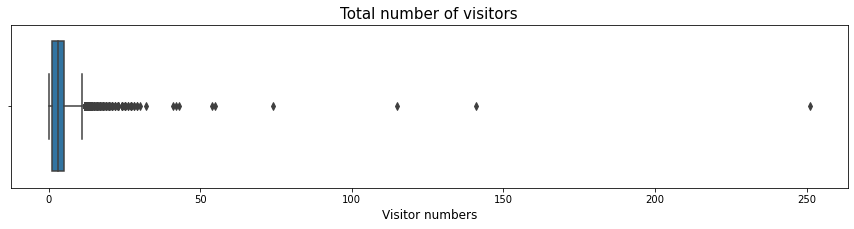

In [35]:
# check outliers in TotalVisits

plt.figure(figsize=[15,3])
sns.boxplot(df.TotalVisits)
plt.title('Total number of visitors', fontsize=15)
plt.xlabel('Visitor numbers', fontsize=12)
plt.xscale('linear')
plt.show()

Cases of extreme outliers are clearly visible

In [36]:
# Function to replace outliers with median
def replace_outlier_with_median(var,n):
    median = df.loc[df[var]<n, var].median()
    df[var] = np.where(df[var] >n, median,df[var])
    print(df[var].describe())

In [37]:
#Replacing Outlier of TotalVisits with median value
replace_outlier_with_median('TotalVisits',100)

# Imputing null values with median
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())

count    9074.000000
mean        3.401146
std         3.659873
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        74.000000
Name: TotalVisits, dtype: float64


In [38]:
# Examine Total Time Spent on Website
df["Total Time Spent on Website"].describe()

count    9204.000000
mean      489.005541
std       547.980340
min         0.000000
25%        14.000000
50%       250.000000
75%       938.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [39]:
df['Total Time Spent on Website'].value_counts()

0       2165
60        19
127       18
75        18
74        18
        ... 
1235       1
1091       1
1043       1
1035       1
1915       1
Name: Total Time Spent on Website, Length: 1730, dtype: int64

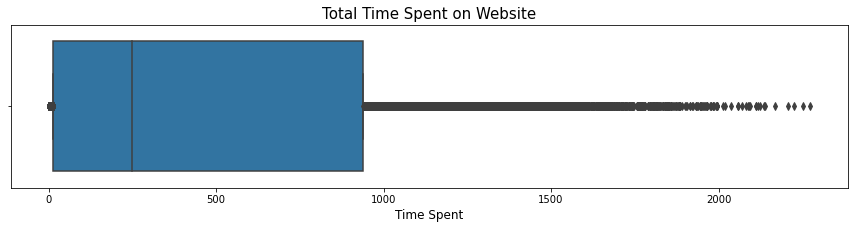

In [40]:
# check outliers in Total Time Spent on Website

plt.figure(figsize=[15,3])
sns.boxplot(df["Total Time Spent on Website"],whis = -50)
plt.title('Total Time Spent on Website', fontsize=15)
plt.xlabel('Time Spent', fontsize=12)
plt.xscale('linear')
plt.show()

No extreme or isolated outliers in "Total Time Spent on Website" variable

In [41]:
# #Examine variable 'Page Views Per Visit' 
df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [42]:
df['Page Views Per Visit'].value_counts()

0.00    2161
2.00    1794
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

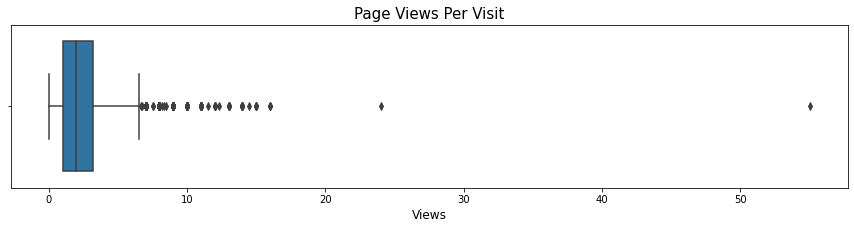

In [43]:
# check outliers in Page Views Per Visit

plt.figure(figsize=[15,3])
sns.boxplot(df['Page Views Per Visit'])
plt.title('Page Views Per Visit', fontsize=15)
plt.xlabel('Views', fontsize=12)
plt.xscale('linear')
plt.show()

Cases of extreme outliers are clearly visible

In [44]:
# calling function to impute with median
replace_outlier_with_median("Page Views Per Visit",20)

count    9074.000000
mean        2.361886
std         2.076648
min         0.000000
25%         1.000000
50%         2.000000
75%         3.127500
max        16.000000
Name: Page Views Per Visit, dtype: float64


In [45]:
# Imputing null values with median

df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

In [46]:
#Examine variable 'Last Activity' 
df['Last Activity'].describe()

count             9103
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

In [47]:
df['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [48]:
# Grouping and replacing
Other_last_activity = ['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront',
                       'View in browser link Clicked', 'Email Received', 'Email Marked Spam', 
                       'Visited Booth in Tradeshow', 'Resubscribed to emails']

df['Last Activity'] = df['Last Activity'].replace(Other_last_activity, 'Others')

In [49]:
# imputing null values with mode
df['Last Activity'] = df['Last Activity'].fillna(df['Last Activity'].mode()[0])

In [50]:
#Examine variable 'Specialization'
df['Specialization'].value_counts()

Finance Management                   973
Human Resource Management            847
Marketing Management                 837
Operations Management                502
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                158
Hospitality Management               114
E-COMMERCE                           111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [51]:
# imputing null with not specified category
df['Specialization'] = df['Specialization'].fillna('Not Specified')

In [52]:
df['What is your current occupation'].value_counts()

Unemployed              5567
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [53]:
# Grouping and replacing
Other_occupation = ['Other', 'Housewife', 'Businessman']
df['What is your current occupation'] = df['What is your current occupation'].replace(Other_occupation, 'Others')

In [54]:
# imputing null values as a category
df['What is your current occupation'] = df['What is your current occupation'].fillna('Not Specified')

In [55]:
#Examine variable 'Tags'
df['Tags'].value_counts()

Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to Others

In [56]:
# Grouping and replacing
Other_tags = ['Diploma holder (Not Eligible)', 'number not provided', 'in touch with EINS', 'Lost to Others',
              'Still Thinking', 'Want to take admission but has financial problems', 'In confusion whether part time or DLP',
              'Interested in Next batch', 'Lateral student', 'Shall take in the next coming month',
              'University not recognized', 'Recognition issue (DEC approval)']
phone_unreachable = ['invalid number', 'wrong number given', 'opp hangup', 'Ringing', 'switched off', 'Busy']

df['Tags'] = df['Tags'].replace(Other_tags, 'Others')
df['Tags'] = df['Tags'].replace(phone_unreachable, 'Phone Unreachable')

In [57]:
# Re-examine variable 'Tags'
df['Tags'].value_counts()

Will revert after reading the email    2052
Phone Unreachable                      1789
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Lost to EINS                            174
Not doing further education             145
Others                                  138
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [58]:
df['Tags'] = df['Tags'].fillna('Not Specified')

In [59]:
#Examine variable 'City'
df['City'].value_counts()

Mumbai                         3220
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

In [60]:
df['City'] = df['City'].fillna('Not Specified')

In [61]:
# #Examine variable 'Last Notable Activity'
df['Last Notable Activity'].value_counts()

Modified                        3397
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Resubscribed to emails             1
Email Received                     1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [62]:
# Grouping and replacing
Other_activity = ['Email Bounced', 'Unsubscribed', 'Unreachable', 'Had a Phone Conversation', 'Email Marked Spam',
                  'Approached upfront', 'Resubscribed to emails', 'View in browser link Clicked', 'Form Submitted on Website', 'Email Received']

df['Last Notable Activity'] = df['Last Notable Activity'].replace(Other_activity,'Others')

In [63]:
# checking null values
df.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Country                                   0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9204 non-null   int64  
 1   Lead Origin                             9204 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9204 non-null   int64  
 4   Converted                               9204 non-null   int64  
 5   TotalVisits                             9204 non-null   float64
 6   Total Time Spent on Website             9204 non-null   int64  
 7   Page Views Per Visit                    9204 non-null   float64
 8   Last Activity                           9204 non-null   object 
 9   Country                                 9204 non-null   int64  
 10  Specialization                          9204 non-null   obje

As we can see all the null values are removed from the dataset. Now, we need to check for the outliers for the remaining variables.

In [65]:
# numeric columns
num_cols = df._get_numeric_data().columns
num_cols

Index(['Lead Number', 'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [66]:
# Checking different percentiles of numeric columns
df[num_cols].describe(percentiles=[.25, .5, .75, .90, .95, .99])

Lead Number  Do Not Email    Converted  TotalVisits  \
count    9204.000000   9204.000000  9204.000000   9204.00000   
mean   617194.608648      0.078336     0.383746      3.39548   
std     23418.830233      0.268713     0.486324      3.63424   
min    579533.000000      0.000000     0.000000      0.00000   
25%    596484.500000      0.000000     0.000000      1.00000   
50%    615479.000000      0.000000     0.000000      3.00000   
75%    637409.250000      0.000000     1.000000      5.00000   
90%    650513.100000      0.000000     1.000000      7.00000   
95%    655405.850000      1.000000     1.000000     10.00000   
99%    659599.460000      1.000000     1.000000     17.00000   
max    660737.000000      1.000000     1.000000     74.00000   

       Total Time Spent on Website  Page Views Per Visit      Country  \
count                  9204.000000           9204.000000  9204.000000   
mean                    489.005541              2.356774     0.968818   
std                     547.980340              2.062371     0.173819   
min                       0.000000              0.000000     0.000000   
25%                      14.000000              1.000000     1.000000   
50%                     250.000000              2.000000     1.000000   
75%                     938.000000              3.000000     1.000000   
90%                    1380.000000              5.000000     1.000000   
95%                    1562.000000              6.000000     1.000000   
99%                    1839.970000              9.000000     1.000000   
max                    2272.000000             16.000000     1.000000   

       A free copy of Mastering The Interview  
count                             9204.000000  
mean                                 0.313777  
std                                  0.464052  
min                                  0.000000  
25%                                  0.000000  
50%                                  0.000000  
75%                                  1.000000  
90%                                  1.000000  
95%                                  1.000000  
99%                                  1.000000  
max                                  1.000000

In [67]:
#Removing binary variables
num_cols = num_cols.drop(binary_varlist)

#Removing other binary variables
num_cols = num_cols.drop(['Converted','Country'])
print(num_cols)

Index(['Lead Number', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')


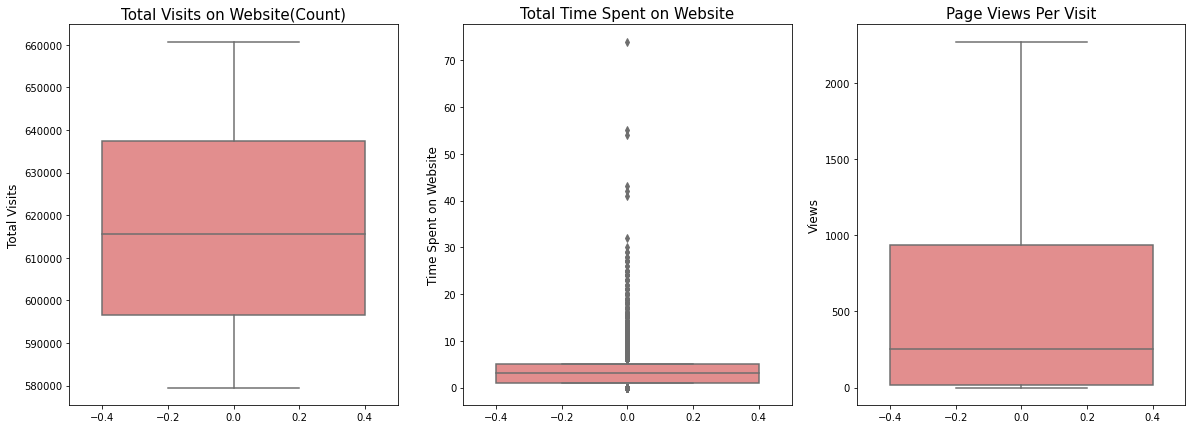

In [68]:
#Again checking outliers and Ignoring Lead Number as its just unique identification number. 
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.boxplot(data=df[num_cols[0]],orient = "v", color = "lightcoral")
plt.title('Total Visits on Website(Count)', fontsize=15)
plt.ylabel('Total Visits', fontsize=12)
plt.xscale('linear')

plt.subplot(1,3,2)
sns.boxplot(data=df[num_cols[1]],orient = "v", color = "lightcoral", whis = -100)
plt.title('Total Time Spent on Website', fontsize=15)
plt.ylabel('Time Spent on Website', fontsize=12)
plt.xscale('linear')

plt.subplot(1,3,3)
sns.boxplot(data=df[num_cols[2]],orient = "v", color = "lightcoral")
plt.title('Page Views Per Visit', fontsize=15)
plt.ylabel('Views', fontsize=12)
plt.xscale('linear')

plt.show()


All Outliers are taken care of as we can see on graph. In the varaiable 'Total Time Spent on Website' we have kept the 70 because this value is similar to the near by values 50 and 60 values. 

In [69]:
df.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity  Country           Specialization  \
0  Page Visited on Website        1            Not Specified   
1             Email Opened        1            Not Specified   
2             Email Opened        1  Business Administration   
3                   Others        1    Media and Advertising   
4        Converted to Lead        1            Not Specified   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                    Phone Unreachable   
2                         Student  Will revert after reading the email   
3                      Unemployed                    Phone Unreachable   
4                      Unemployed  Will revert after reading the email   

            City  A free copy of Mastering The Interview Last Notable Activity  
0  Not Specified                                       0              Modified  
1  Not Specified                                       0          Email Opened  
2         Mumbai                                       1          Email Opened  
3         Mumbai                                       0              Modified  
4         Mumbai                                       0              Modified

### Converted is our Target variable, let's perform some EDA taking it as our base comparison variable. 

In [70]:
#First let's check the current conversion rate
Conversion_rate = round(df.Converted.sum()/len(df.Converted)*100,2)
print(f'Conversion rate before the model is {Conversion_rate}%')

Conversion rate before the model is 38.37%


Current conversion rate is 38% we need to build a model to provide high quality leads so that the conversion rate is increased. 

# Exploratory Data Analysis

In [71]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Categorical Variables

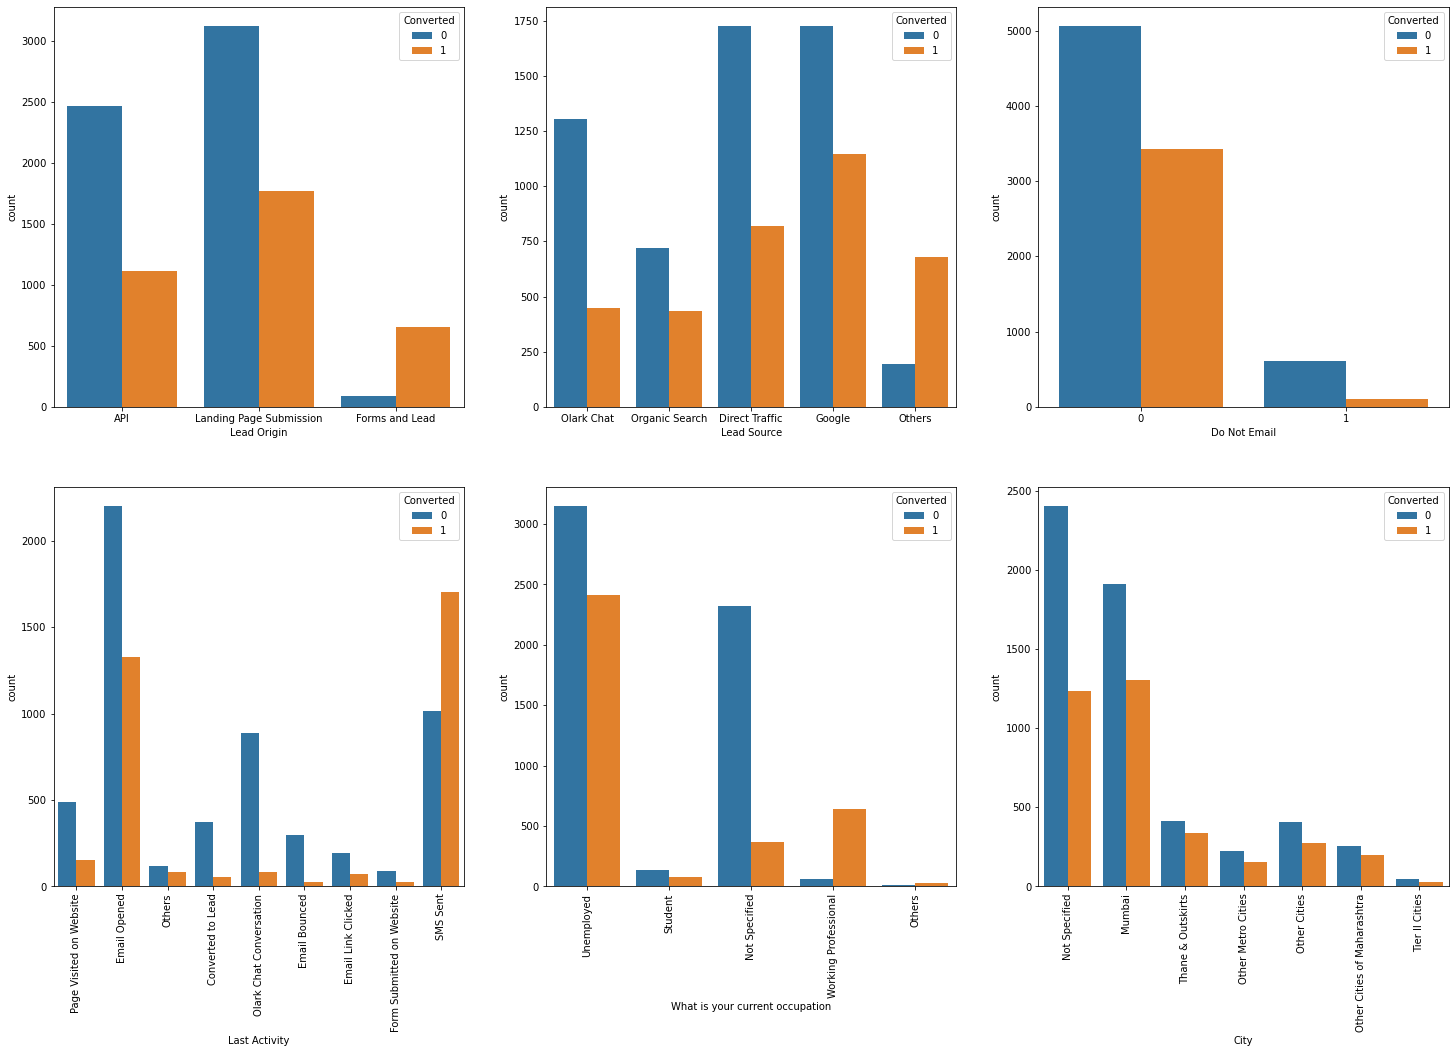

In [72]:
# Countplots of Converted with different categorical variables
plt.figure(figsize=(25,25))

plt.subplot(3,3,1)
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
plt.xticks(rotation=0)

plt.subplot(3,3,2)
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation=0)

plt.subplot(3,3,3)
sns.countplot(x = "Do Not Email", hue = "Converted", data = df)
plt.xticks(rotation=0)

plt.subplot(3,3,4)
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.countplot(x = "City", hue = "Converted", data = df)
plt.xticks(rotation=90)

plt.show()

Most leads are converted from the following categories:

*     Leads who are currently unemployed or are working professionals - These two categories should be X company's main focus area.
*     Leads who live in Mumbai - X company can start marketing in other cities as well, to grow its business.
*     When leads took some actions like; 'SMS sent' to any company executive or 'Email Opened', they lead to higher conversion. Here the company can build more attractive email templates with catchy subject lines, to increase email opening count even further, and consequently, the lead conversion rate.
*     'Landing page submission' and 'Google' search have shown the maximum lead convertion count so the company can invest on SEO or SEM to further optimize its website, to generate even more traffic.

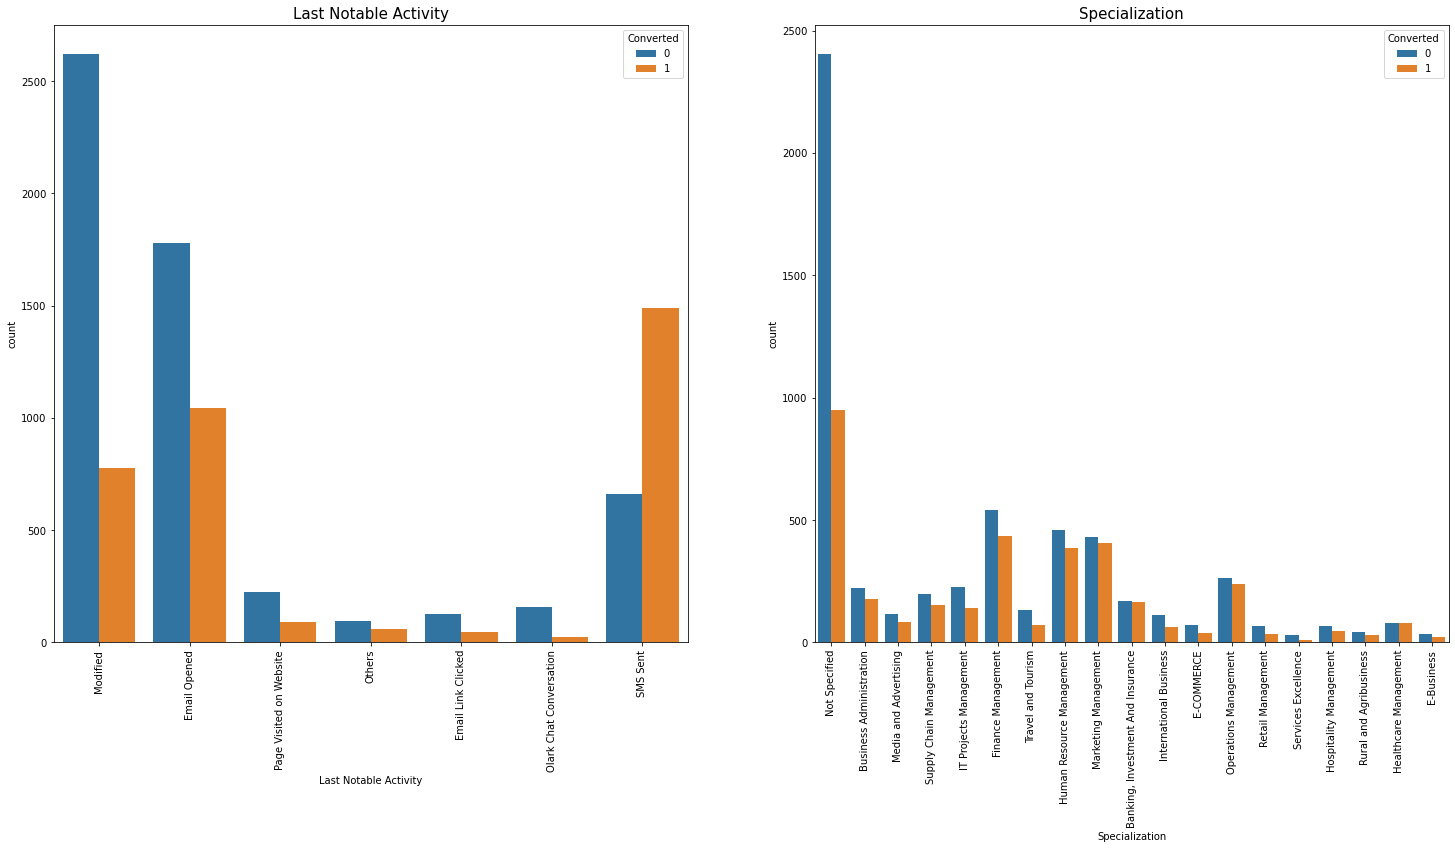

In [73]:
# Countplots of Last Notable Activity and Specialization vs Converted
plt.figure(figsize=(25,25))

plt.subplot(2,2,1)
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
plt.title("Last Notable Activity", fontsize=15)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.countplot(x = "Specialization", hue = "Converted", data = df)
plt.title("Specialization", fontsize=15)
plt.xticks(rotation=90)

plt.show()

Most leads are converted from the following categories:

*     When Client modify its request so company can ask his sales team to push client to modify its request if the client deny to opt the course he was looking for.
* 'SMS Sent' has the best converted to not-converted ratio.
*     Management Specializations like Finance, HR, Marketing, and Operations, have very high lead conversion counts, they can be our focus area.
* Leads who had not mentioned their specializations have the highest conversion count.



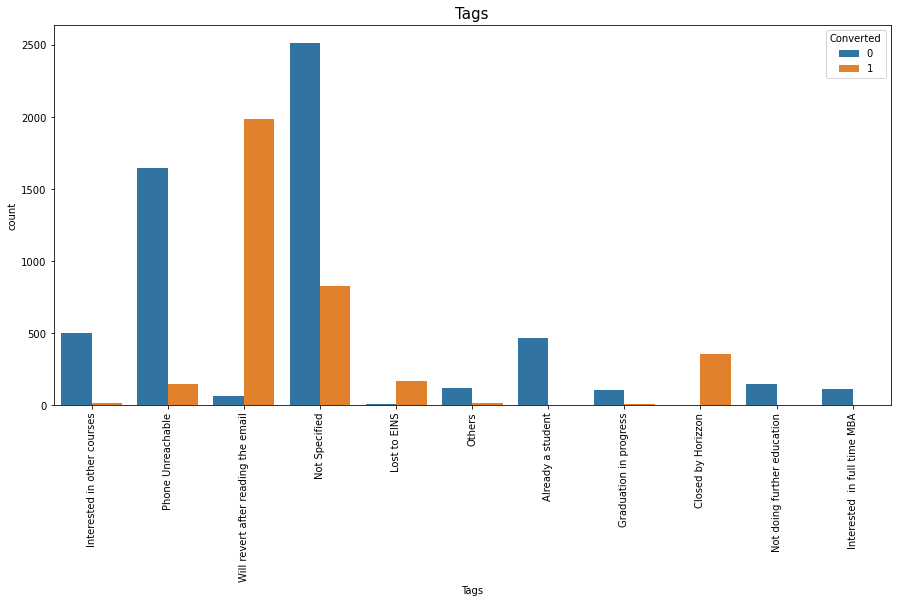

In [74]:
# Tags graph
plt.figure(figsize=(15,7))
sns.countplot(x = "Tags", hue = "Converted", data = df)
plt.title("Tags", fontsize=15)
plt.xticks(rotation=90)
plt.show()

* 'Revert after reading email' and 'Closed by Horizzon' are among the best sources of lead conversion.
* 'Not specified' is also the second highest in count.

### Numerical Variables

In [75]:
#Perfoming EDA on numerical variables
data_numerical = df.select_dtypes(exclude = ['object','datetime64'])
data_numerical.head()

Lead Number  Do Not Email  Converted  TotalVisits  \
0       660737             0          0          0.0   
1       660728             0          0          5.0   
2       660727             0          1          2.0   
3       660719             0          0          1.0   
4       660681             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  Country  \
0                            0                   0.0        1   
1                          674                   2.5        1   
2                         1532                   2.0        1   
3                          305                   1.0        1   
4                         1428                   1.0        1   

   A free copy of Mastering The Interview  
0                                       0  
1                                       0  
2                                       1  
3                                       0  
4                                       0

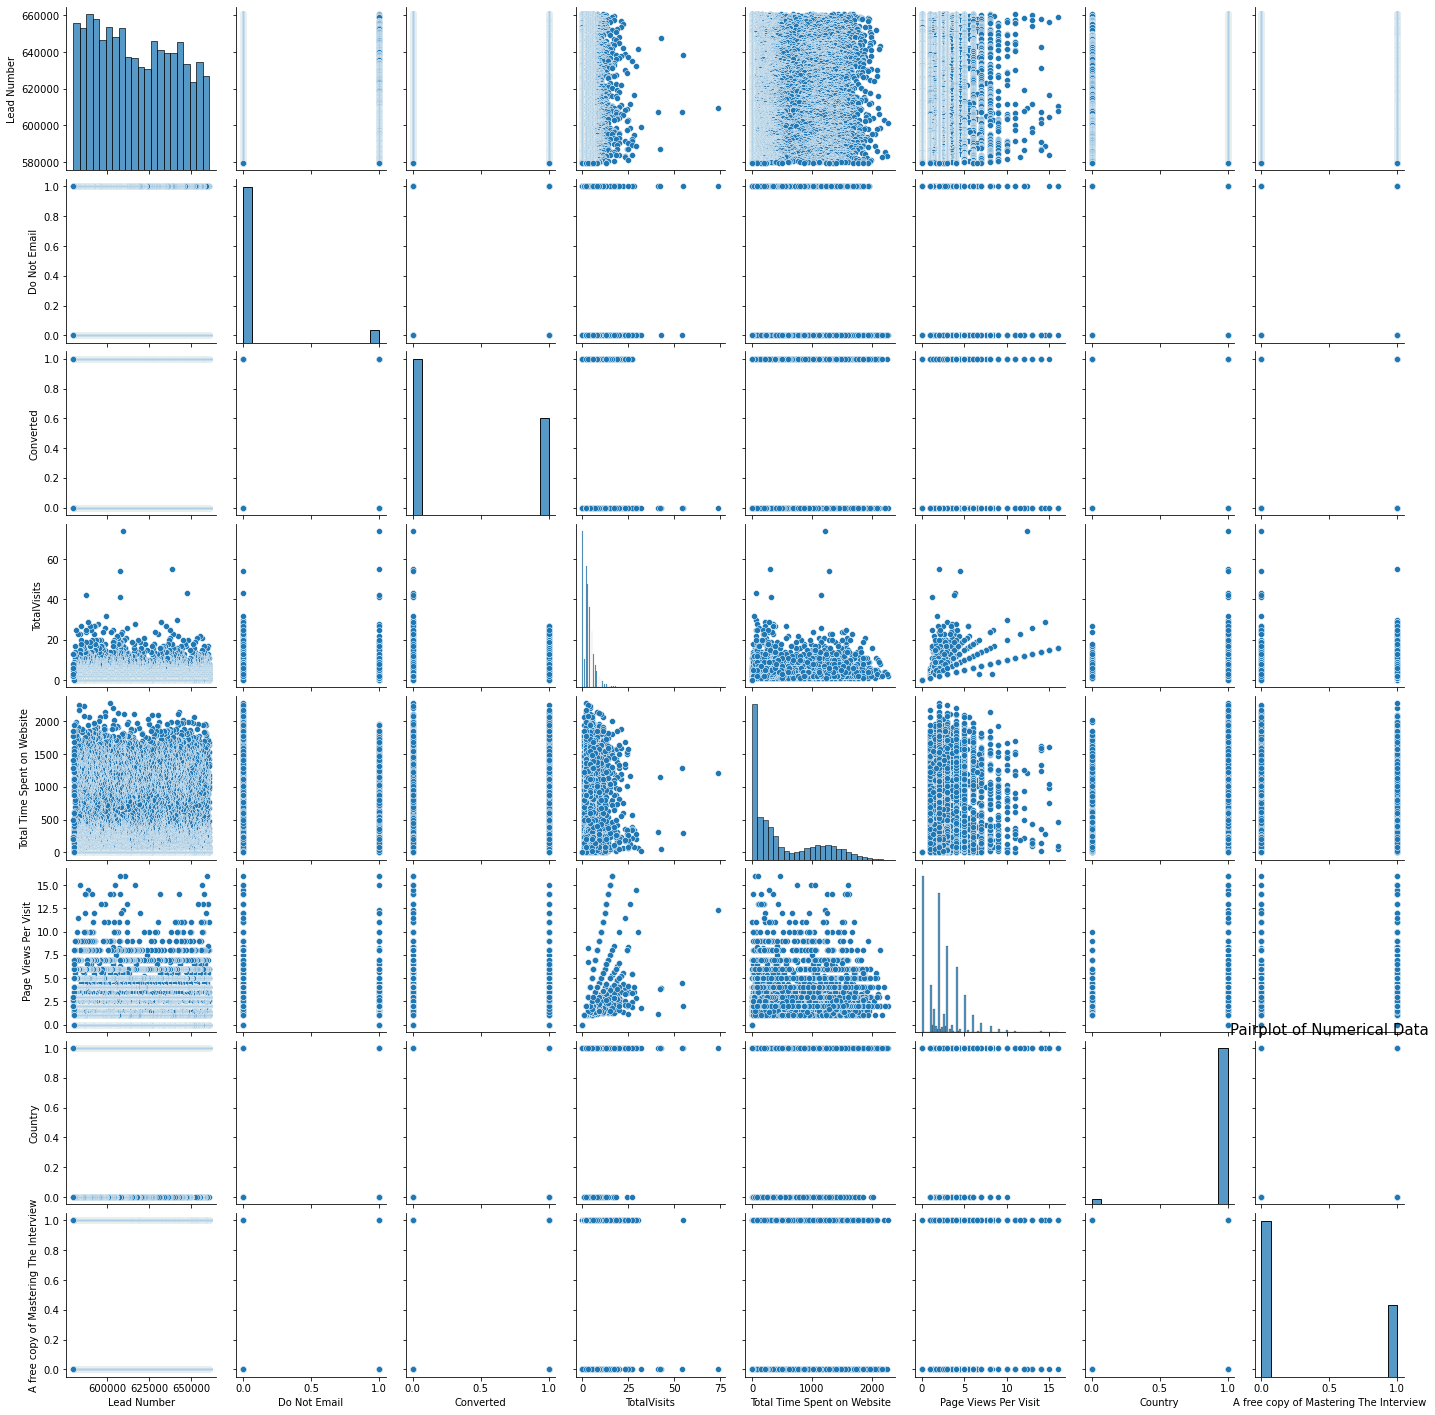

In [76]:
# Pairplot of Numerical Data
sns.pairplot(data_numerical)
plt.title('Pairplot of Numerical Data', fontsize=15)
plt.show()

In [77]:
# Checking correlation in df
cor = data_numerical.corr()
cor

Lead Number  Do Not Email  Converted  \
Lead Number                                1.000000     -0.098669   0.025006   
Do Not Email                              -0.098669      1.000000  -0.140256   
Converted                                  0.025006     -0.140256   1.000000   
TotalVisits                                0.030614      0.024018   0.038373   
Total Time Spent on Website                0.019740     -0.046358   0.366428   
Page Views Per Visit                       0.057641      0.028865  -0.000887   
Country                                    0.034164     -0.054712   0.033595   
A free copy of Mastering The Interview    -0.110127      0.059052  -0.037680   

                                        TotalVisits  \
Lead Number                                0.030614   
Do Not Email                               0.024018   
Converted                                  0.038373   
TotalVisits                                1.000000   
Total Time Spent on Website                0.292585   
Page Views Per Visit                       0.644883   
Country                                   -0.033284   
A free copy of Mastering The Interview     0.252429   

                                        Total Time Spent on Website  \
Lead Number                                                0.019740   
Do Not Email                                              -0.046358   
Converted                                                  0.366428   
TotalVisits                                                0.292585   
Total Time Spent on Website                                1.000000   
Page Views Per Visit                                       0.324015   
Country                                                   -0.026103   
A free copy of Mastering The Interview                     0.167176   

                                        Page Views Per Visit   Country  \
Lead Number                                         0.057641  0.034164   
Do Not Email                                        0.028865 -0.054712   
Converted                                          -0.000887  0.033595   
TotalVisits                                         0.644883 -0.033284   
Total Time Spent on Website                         0.324015 -0.026103   
Page Views Per Visit                                1.000000 -0.037303   
Country                                            -0.037303  1.000000   
A free copy of Mastering The Interview              0.284211 -0.117127   

                                        A free copy of Mastering The Interview  
Lead Number                                                          -0.110127  
Do Not Email                                                          0.059052  
Converted                                                            -0.037680  
TotalVisits                                                           0.252429  
Total Time Spent on Website                                           0.167176  
Page Views Per Visit                                                  0.284211  
Country                                                              -0.117127  
A free copy of Mastering The Interview                                1.000000

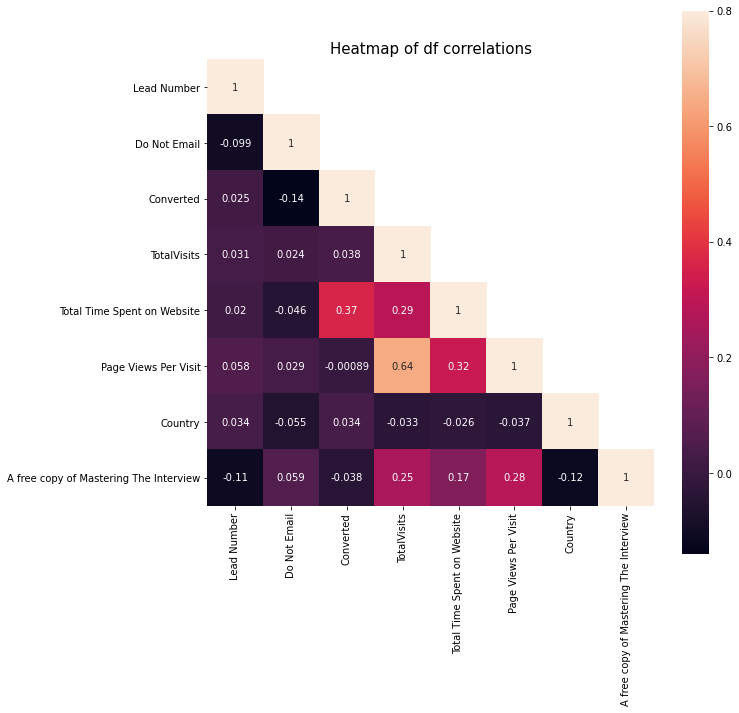

In [78]:
# Heatmap of df correlations
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)
plt.title('Heatmap of df correlations', fontsize=15)
plt.show()

After looking into scatter plot and heatmap we have seen that the variables "TotalVisits","Total time spent on website" and "Page Views per visit" are highly corelated. However we will be dropping on the basis of correlation among dummies later on and not here.

## Converting categorical variables with more than 2 levels to dummies

In [79]:
# Creating dummy variables for the categorical variables and dropping the first one.
dummy_var = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', "City",
                               'Last Notable Activity']])

# Adding the results to main dataframe
df = pd.concat([df,dummy_var], axis=1)

In [80]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', "City", 
                      'Last Notable Activity'])

In [81]:
df.head()

Lead Number  Do Not Email  Converted  TotalVisits  \
0       660737             0          0          0.0   
1       660728             0          0          5.0   
2       660727             0          1          2.0   
3       660719             0          0          1.0   
4       660681             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  Country  \
0                            0                   0.0        1   
1                          674                   2.5        1   
2                         1532                   2.0        1   
3                          305                   1.0        1   
4                         1428                   1.0        1   

   A free copy of Mastering The Interview  Lead Origin_API  \
0                                       0                1   
1                                       0                1   
2                                       1                0   
3                                       0                0   
4                                       0                0   

   Lead Origin_Forms and Lead  ...  City_Other Metro Cities  \
0                           0  ...                        0   
1                           0  ...                        0   
2                           0  ...                        0   
3                           0  ...                        0   
4                           0  ...                        0   

   City_Thane & Outskirts  City_Tier II Cities  \
0                       0                    0   
1                       0                    0   
2                       0                    0   
3                       0                    0   
4                       0                    0   

   Last Notable Activity_Email Link Clicked  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                   0                               1   
1                                   1                               0   
2                                   1                               0   
3                                   0                               1   
4                                   0                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Others  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  

[5 rows x 74 columns]

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 74 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9204 non-null   int64  
 1   Do Not Email                                          9204 non-null   int64  
 2   Converted                                             9204 non-null   int64  
 3   TotalVisits                                           9204 non-null   float64
 4   Total Time Spent on Website                           9204 non-null   int64  
 5   Page Views Per Visit                                  9204 non-null   float64
 6   Country                                               9204 non-null   int64  
 7   A free copy of Mastering The Interview                9204 non-null   int64  
 8   Lead Origin_API                                       9204

# Train Test Split of data

In [83]:
# features
X = df.drop(['Converted','Lead Number'], axis=1)
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  Country  A free copy of Mastering The Interview  \
0                   0.0        1                                       0   
1                   2.5        1                                       0   
2                   2.0        1                                       1   
3                   1.0        1                                       0   
4                   1.0        1                                       0   

   Lead Origin_API  Lead Origin_Forms and Lead  \
0                1                           0   
1                1                           0   
2                0                           0   
3                0                           0   
4                0                           0   

   Lead Origin_Landing Page Submission  Lead Source_Direct Traffic  ...  \
0                                    0                           0  ...   
1                                    0                           0  ...   
2                                    1                           1  ...   
3                                    1                           1  ...   
4                                    1                           0  ...   

   City_Other Metro Cities  City_Thane & Outskirts  City_Tier II Cities  \
0                        0                       0                    0   
1                        0                       0                    0   
2                        0                       0                    0   
3                        0                       0                    0   
4                        0                       0                    0   

   Last Notable Activity_Email Link Clicked  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                   0                               1   
1                                   1                               0   
2                                   1                               0   
3                                   0                               1   
4                                   0                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Others  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  

[5 rows x 72 columns]

In [84]:
#target variable
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [85]:
## Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [86]:
# applying scaler to relevant columns
scaler = MinMaxScaler()

num_feat = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[num_feat] = scaler.fit_transform(X_train[num_feat])
X_test[num_feat] = scaler.transform(X_test[num_feat])
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
5310             0     0.072727                     0.044454   
2181             0     0.145455                     0.115317   
8215             0     0.000000                     0.000000   
8887             0     0.036364                     0.101232   
7920             0     0.072727                     0.086708   

      Page Views Per Visit  Country  A free copy of Mastering The Interview  \
5310                 0.250        0                                       1   
2181                 0.500        1                                       0   
8215                 0.000        1                                       0   
8887                 0.125        1                                       0   
7920                 0.250        1                                       1   

      Lead Origin_API  Lead Origin_Forms and Lead  \
5310                0                           0   
2181                0                           0   
8215                1                           0   
8887                1                           0   
7920                0                           0   

      Lead Origin_Landing Page Submission  Lead Source_Direct Traffic  ...  \
5310                                    1                           1  ...   
2181                                    1                           0  ...   
8215                                    0                           0  ...   
8887                                    0                           1  ...   
7920                                    1                           1  ...   

      City_Other Metro Cities  City_Thane & Outskirts  City_Tier II Cities  \
5310                        0                       0                    0   
2181                        0                       0                    0   
8215                        0                       0                    0   
8887                        0                       0                    0   
7920                        1                       0                    0   

      Last Notable Activity_Email Link Clicked  \
5310                                         0   
2181                                         0   
8215                                         0   
8887                                         0   
7920                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
5310                                   0                               0   
2181                                   1                               0   
8215                                   0                               1   
8887                                   0                               0   
7920                                   1                               0   

      Last Notable Activity_Olark Chat Conversation  \
5310                                              0   
2181                                              0   
8215                                              0   
8887                                              0   
7920                                              0   

      Last Notable Activity_Others  \
5310                             0   
2181                             0   
8215                             0   
8887                             0   
7920                             0   

      Last Notable Activity_Page Visited on Website  \
5310                                              0   
2181                                              0   
8215                                              0   
8887                                              0   
7920                                              0   

      Last Notable Activity_SMS Sent  
5310                               1  
2181                               0  
8215                               0  
8887                               1  
7920                               0  

[5 ro

# Correlation Analysis

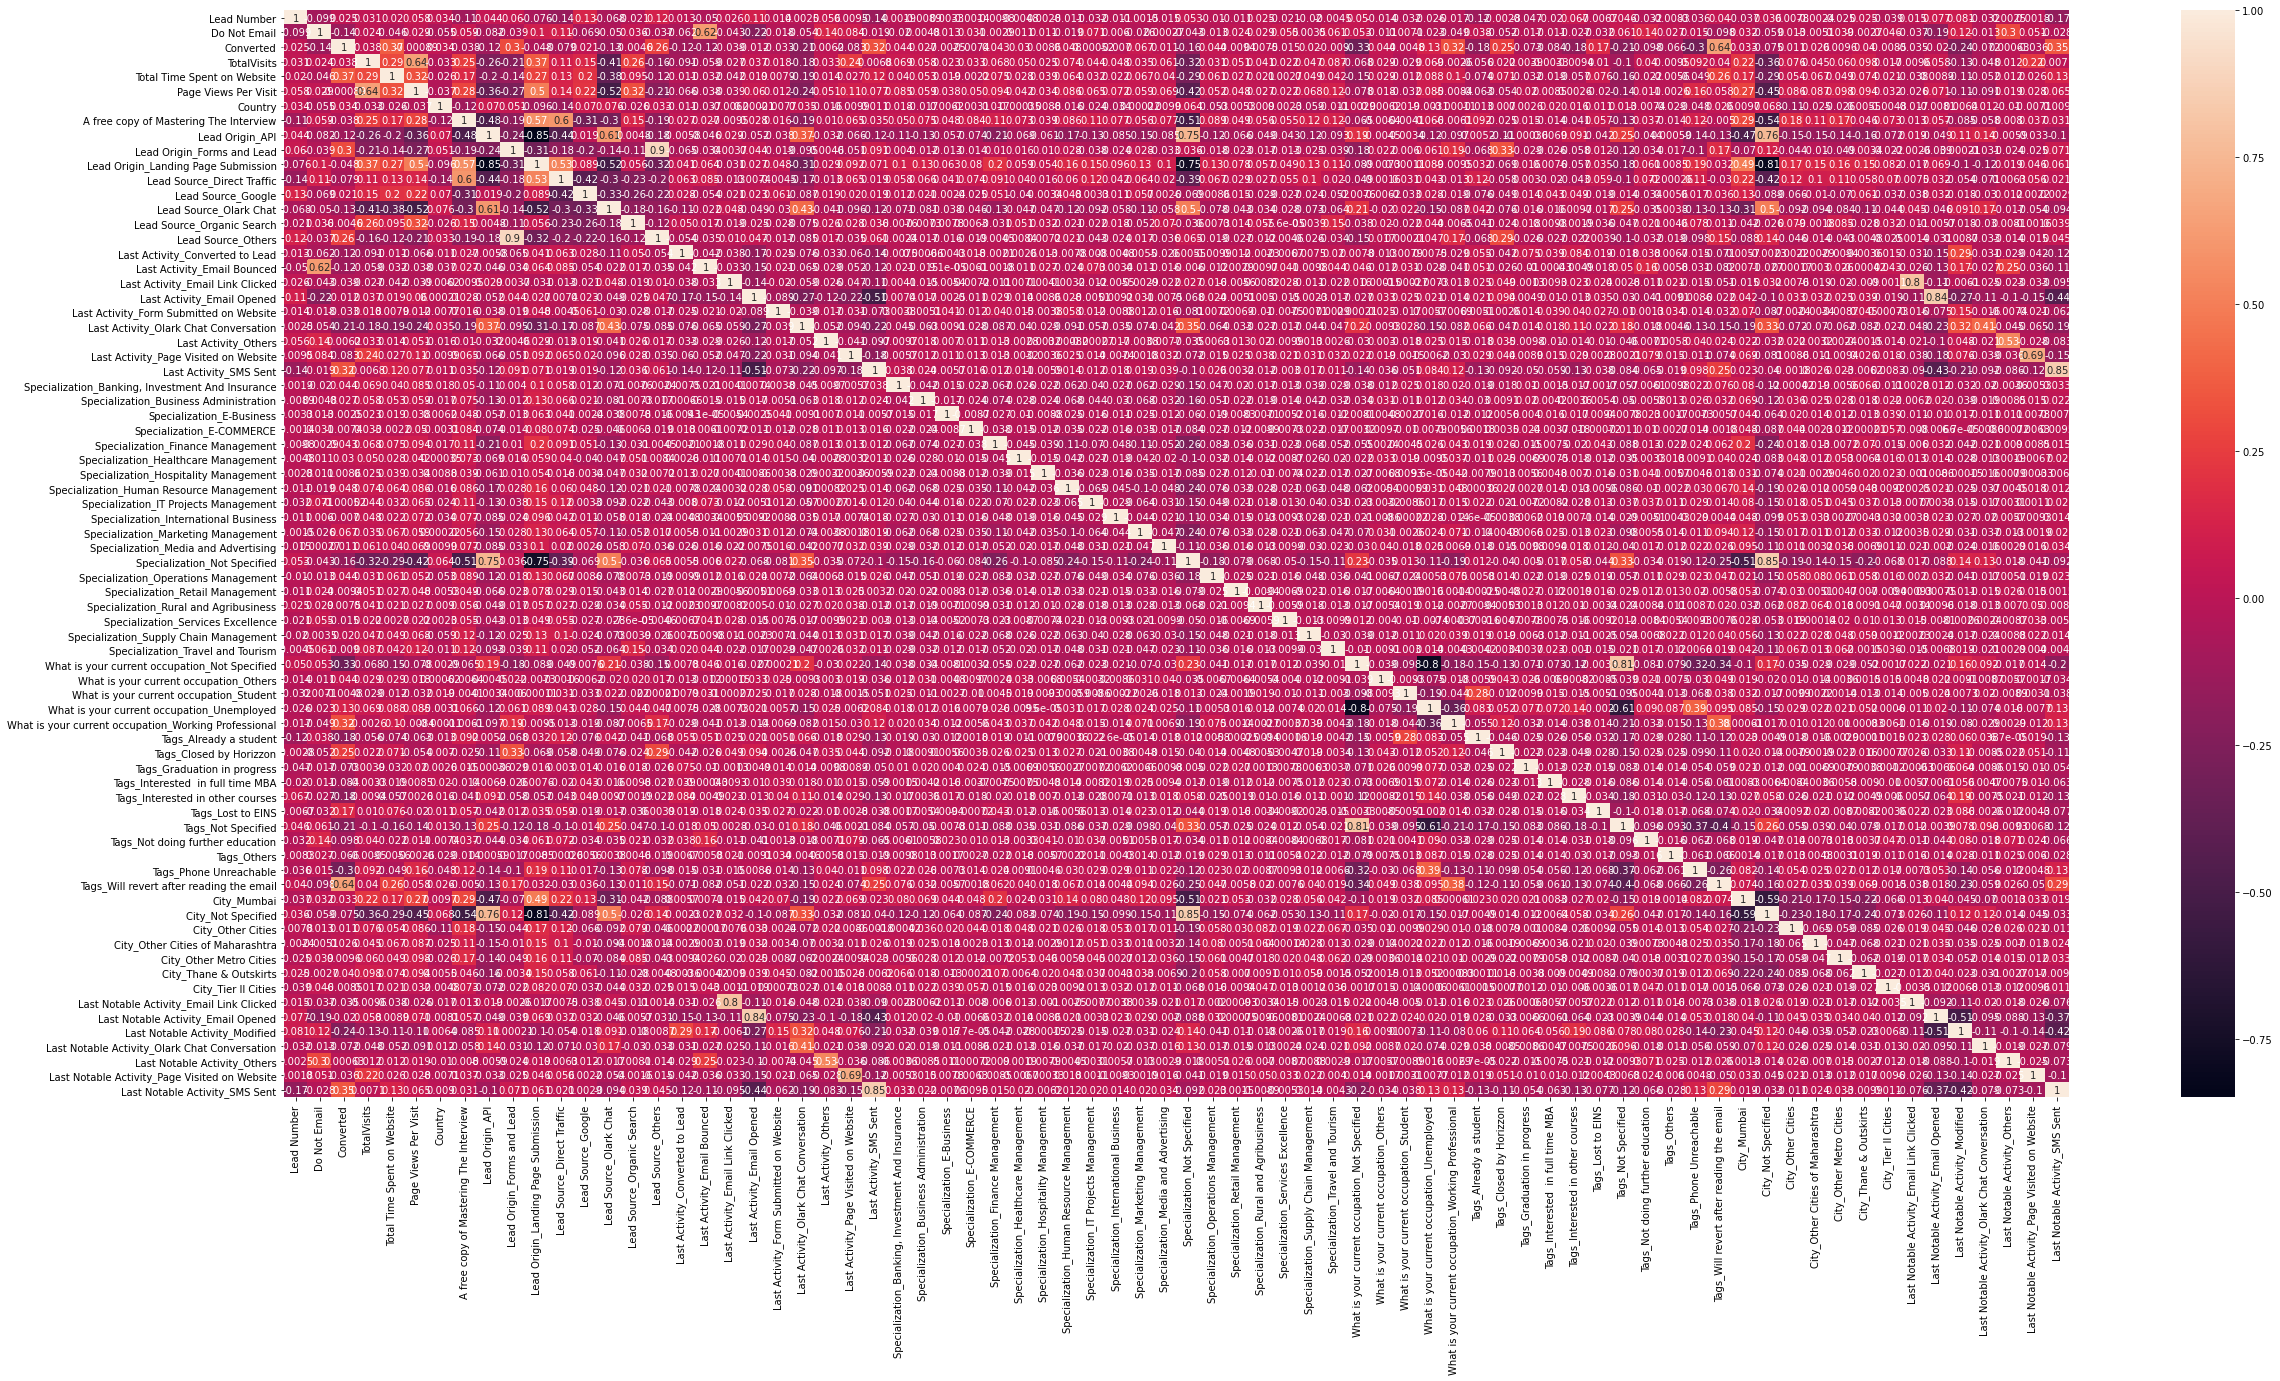

In [87]:
# heatmap of df correlations
plt.figure(figsize = (40,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [88]:
# looking for top correlated dummy variables
corr_matrix = df.corr().abs()

# the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
sol[:30]

Lead Origin_Forms and Lead                     Lead Source_Others                               0.903635
Last Activity_SMS Sent                         Last Notable Activity_SMS Sent                   0.852241
Lead Origin_API                                Lead Origin_Landing Page Submission              0.848515
Specialization_Not Specified                   City_Not Specified                               0.845161
Last Activity_Email Opened                     Last Notable Activity_Email Opened               0.842692
What is your current occupation_Not Specified  Tags_Not Specified                               0.810845
Lead Origin_Landing Page Submission            City_Not Specified                               0.808151
Last Activity_Email Link Clicked               Last Notable Activity_Email Link Clicked         0.800747
What is your current occupation_Not Specified  What is your current occupation_Unemployed       0.795044
Lead Origin_API                                City_Not

## Dropping highly correlated dummy variables

In [89]:
# Dropping highly correlated dummy variables >0.6
X_test = X_test.drop(['Lead Source_Others','Last Activity_SMS Sent','Lead Origin_Landing Page Submission','Specialization_Not Specified','Last Activity_Email Opened',
                       'Tags_Not Specified','Last Activity_Email Link Clicked', 'What is your current occupation_Not Specified', 'City_Not Specified',
                     'Last Activity_Page Visited on Website', 'Last Activity_Email Bounced', 'Lead Origin_API', 'Last Activity_Others', 'Last Activity_Olark Chat Conversation',
                     'Last Notable Activity_Modified', 'Lead Origin_Landing Page Submission'], 1)
X_train = X_train.drop(['Lead Source_Others','Last Activity_SMS Sent','Lead Origin_Landing Page Submission','Specialization_Not Specified','Last Activity_Email Opened',
                       'Tags_Not Specified','Last Activity_Email Link Clicked', 'What is your current occupation_Not Specified', 'City_Not Specified',
                     'Last Activity_Page Visited on Website', 'Last Activity_Email Bounced', 'Lead Origin_API', 'Last Activity_Others', 'Last Activity_Olark Chat Conversation',
                       'Last Notable Activity_Modified', 'Lead Origin_Landing Page Submission'], 1)

In [90]:
# Checking correlation in X_train after dropping highly correlated dummy variables
corr_matriX = X_train.corr().abs()

# the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

solX = (corr_matriX.where(np.triu(np.ones(corr_matriX.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
solX[:20]

TotalVisits                                           Page Views Per Visit                                    0.637946
A free copy of Mastering The Interview                Lead Source_Direct Traffic                              0.594015
Page Views Per Visit                                  Lead Source_Olark Chat                                  0.511779
Lead Source_Direct Traffic                            Lead Source_Google                                      0.417821
TotalVisits                                           Lead Source_Olark Chat                                  0.408140
What is your current occupation_Unemployed            Tags_Phone Unreachable                                  0.384072
Total Time Spent on Website                           Lead Source_Olark Chat                                  0.381656
What is your current occupation_Working Professional  Tags_Will revert after reading the email                0.372949
Last Notable Activity_Email Opened              

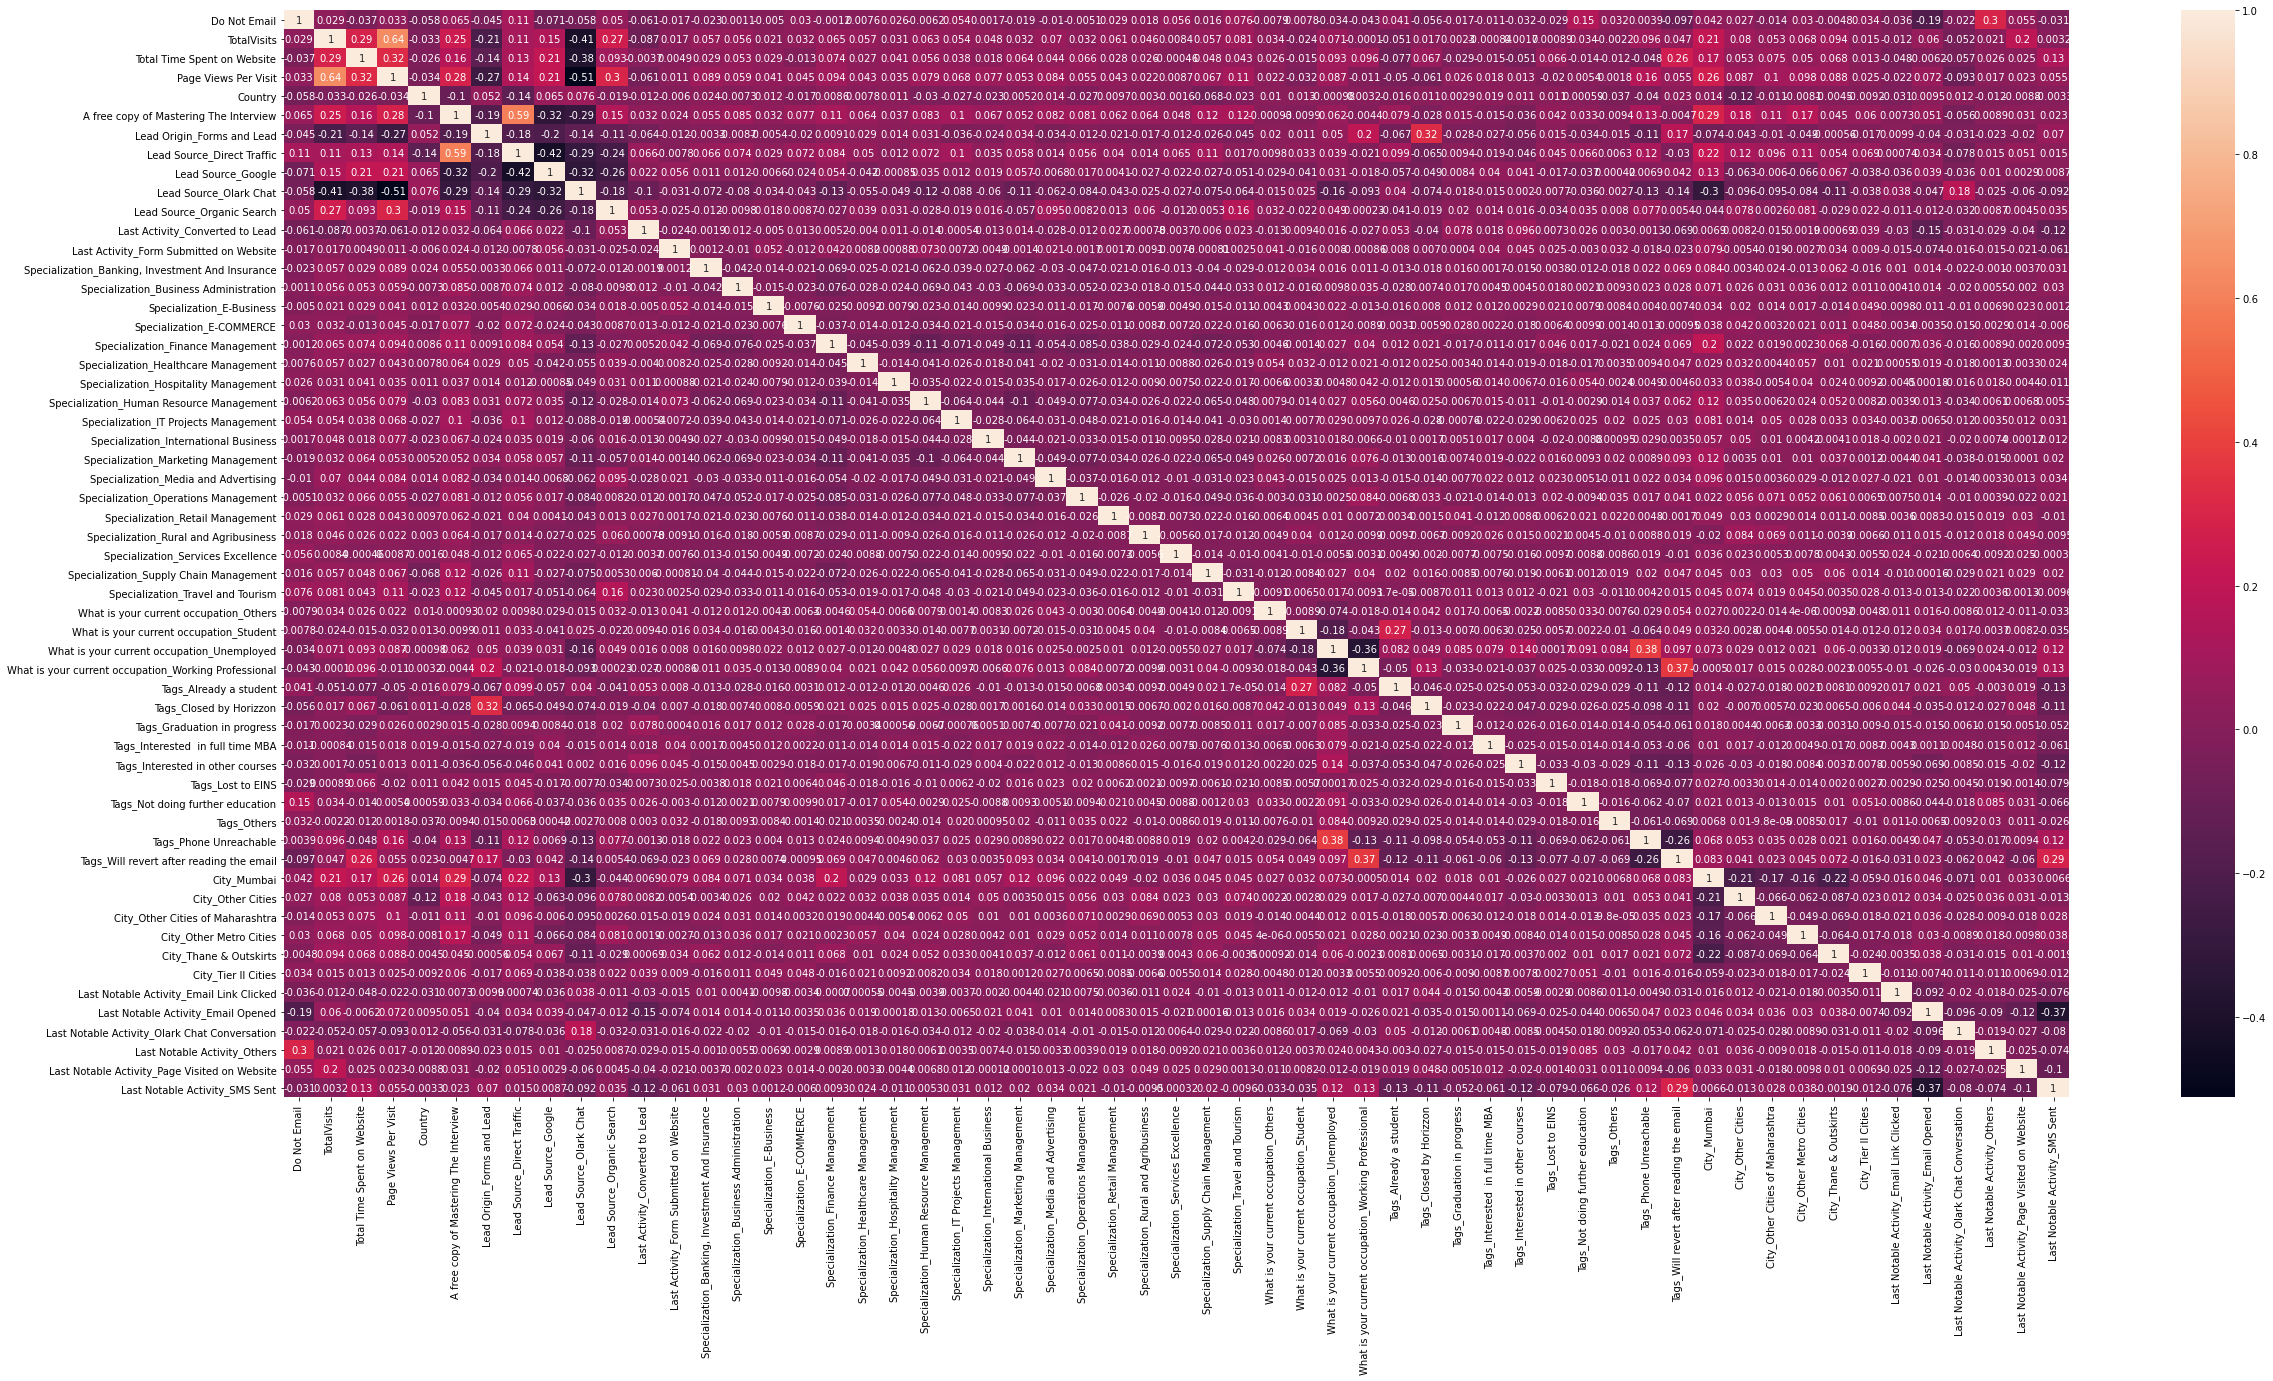

In [91]:
#After dropping highly correlated variables now let's check the correlation matrix again.
plt.figure(figsize = (40,20))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [92]:
X_train.shape

(6442, 57)

# Model Building

In [93]:
logreg = LogisticRegression()

#### MODEL 1

In [94]:
# Building first model without RFE
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6384
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1241.7
Date:                Wed, 13 Oct 2021   Deviance:                       2483.5
Time:                        21:36:40   Pearson chi2:                 7.91e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.0844      0.560     -7.295      0.000      -5.182      -2.987
Do Not Email                                            -1.3339      0.268     -4.972      0.000      -1.860      -0.808
TotalVisits                                              1.3983      1.053      1.327      0.184      -0.666       3.463
Total Time Spent on Website                              4.5767      0.260     17.623      0.000       4.068       5.086
Page Views Per Visit                                    -0.3325      0.621     -0.536      0.592      -1.549       0.884
Country                                                  0.4651      0.334      1.393      0.164      -0.189       1.120
A free copy of Mastering The Interview                  -0.0927      0.178     -0.522      0.602      -0.441       0.256
Lead Origin_Forms and Lead                               1.3389      0.489      2.736      0.006       0.380       2.298
Lead Source_Direct Traffic                              -0.5271      0.442     -1.191      0.234      -1.394       0.340
Lead Source_Google                                      -0.4064      0.428     -0.949      0.343      -1.245       0.433
Lead Source_Olark Chat                                   0.4203      0.446      0.942      0.346      -0.454       1.295
Lead Source_Organic Search                              -0.4760      0.443     -1.076      0.282      -1.343       0.391
Last Activity_Converted to Lead                         -0.6426      0.360     -1.787      0.074      -1.347       0.062
Last Activity_Form Submitted on Website                  0.4022      0.555      0.725      0.468      -0.685       1.489
Specialization_Banking, Investment And Insurance         0.7293      0.382      1.910      0.056      -0.019       1.478
Specialization_Business Administration                   0.4688      0.346      1.356      0.175      -0.209       1.146
Specialization_E-Business                                0.0737      0.727      0.101      0.919      -1.352       1.500
Specialization_E-COMMERCE                                0.4864      0.579      0.841      0.401      -0.648       1.620
Specialization_Finance Management                        0.3005      0.307      0.979      0.328      -0.301       0.902
Specialization_Healthcare Management                     0.1415      0.520      0.272      0.786      -0.878       1.161
Specialization_Hospitality Management                   -0.0016      0.578     -0.003      0.998      -1.135       1.132
Specialization_Human Resource Management                 0.4662      0.299      1.561      0.119      -0.119       1.052
Specialization_IT Projects Management                    0

## Using RFE

In [95]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [96]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True])

In [97]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('Country', False, 14),
 ('A free copy of Mastering The Interview', False, 35),
 ('Lead Origin_Forms and Lead', True, 1),
 ('Lead Source_Direct Traffic', False, 3),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Olark Chat', False, 11),
 ('Lead Source_Organic Search', False, 4),
 ('Last Activity_Converted to Lead', False, 7),
 ('Last Activity_Form Submitted on Website', False, 20),
 ('Specialization_Banking, Investment And Insurance', False, 18),
 ('Specialization_Business Administration', False, 27),
 ('Specialization_E-Business', False, 34),
 ('Specialization_E-COMMERCE', False, 30),
 ('Specialization_Finance Management', False, 36),
 ('Specialization_Healthcare Management', False, 38),
 ('Specialization_Hospitality Management', False, 13),
 ('Specialization_Human Resource Management', False, 26),
 ('Specialization_IT Projects Management', Fals

In [98]:
col = X_train.columns[rfe.support_]

In [99]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Country',
       'A free copy of Mastering The Interview', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Last Activity_Converted to Lead',
       'Last Activity_Form Submitted on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
    

#### MODEL 2

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6421
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1282.2
Date:                Wed, 13 Oct 2021   Deviance:                       2564.4
Time:                        21:36:42   Pearson chi2:                 7.40e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6521      0.136    -26.918      0.000      -3.918      -3.386
Do Not Email                                            -1.3920      0.257     -5.413      0.000      -1.896      -0.888
Total Time Spent on Website                              3.8439      0.222     17.339      0.000       3.409       4.278
Lead Origin_Forms and Lead                               1.4593      0.240      6.072      0.000       0.988       1.930
What is your current occupation_Others                   2.1260      0.838      2.536      0.011       0.483       3.769
What is your current occupation_Student                  2.1886      0.462      4.734      0.000       1.283       3.095
What is your current occupation_Unemployed               2.6508      0.148     17.854      0.000       2.360       2.942
What is your current occupation_Working Professional     2.9302      0.356      8.235      0.000       2.233       3.628
Tags_Already a student                                  -4.8748      0.603     -8.078      0.000      -6.058      -3.692
Tags_Closed by Horizzon                                  4.1860      0.729      5.741      0.000       2.757       5.615
Tags_Graduation in progress                             -2.9280      0.494     -5.930      0.000      -3.896      -1.960
Tags_Interested  in full time MBA                       -3.6517      0.628     -5.816      0.000      -4.882      -2.421
Tags_Interested in other courses                        -4.4379      0.461     -9.629      0.000      -5.341      -3.535
Tags_Lost to EINS                                        5.6142      0.763      7.355      0.000       4.118       7.110
Tags_Not doing further education                        -4.8221      1.024     -4.707      0.000      -6.830      -2.814
Tags_Others                                             -2.8731      0.374     -7.680      0.000      -3.606      -2.140
Tags_Phone Unreachable                                  -4.1503      0.183    -22.643      0.000      -4.510      -3.791
Tags_Will revert after reading the email                 2.1796      0.201     10.829      0.000       1.785       2.574
Last Notable Activity_Email Opened                       0.8478      0.132      6.439      0.000       0.590       1.106
Last Notable Activity_Others                             1.5104      0.445      3.391      0.001       0.637       2.383
Last Notable Activity_SMS Sent                           2.8612      0.150     19.129      0.000       2.568       3.154
========================================================================================================================
"""

In [101]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5310    0.107212
2181    0.015548
8215    0.025280
8887    0.400881
7920    0.077915
4947    0.996595
3073    0.975977
2722    0.996339
499     0.004324
8330    0.994082
dtype: float64

In [102]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10721224, 0.01554832, 0.02527969, 0.40088063, 0.07791527,
       0.9965949 , 0.97597655, 0.99633889, 0.00432402, 0.9940817 ])

In [103]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

Converted  Conversion_Prob  Lead Number
0          0         0.107212         5310
1          0         0.015548         2181
2          0         0.025280         8215
3          0         0.400881         8887
4          0         0.077915         7920

In [104]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  Lead Number  predicted
0          0         0.107212         5310          0
1          0         0.015548         2181          0
2          0         0.025280         8215          0
3          0         0.400881         8887          0
4          0         0.077915         7920          0

In [105]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3750  150]
 [ 317 2225]]


In [106]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9275069854082583


In [107]:
# Check for the VIF values of the feature variables.
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5          What is your current occupation_Unemployed  8.39
16           Tags_Will revert after reading the email  3.90
15                             Tags_Phone Unreachable  3.17
6   What is your current occupation_Working Profes...  2.40
1                         Total Time Spent on Website  1.97
19                     Last Notable Activity_SMS Sent  1.84
7                              Tags_Already a student  1.68
8                             Tags_Closed by Horizzon  1.64
17                 Last Notable Activity_Email Opened  1.57
11                   Tags_Interested in other courses  1.56
2                          Lead Origin_Forms and Lead  1.42
4             What is your current occupation_Student  1.37
13                   Tags_Not doing further education  1.23
0                                        Do Not Email  1.21
14                                        Tags_Others  1.18
12                                  Tags_Lost to EINS  1.15
9                         Tags_Graduation in progress  1.15
18                       Last Notable Activity_Others  1.15
10                  Tags_Interested  in full time MBA  1.14
3              What is your current occupation_Others  1.06

One variable has high VIF, let's drop that variable as they are not helping much with prediction and unnecessarily making the model complex. The variable 'What is your current occupation_Unemployed' is that variable so let's drop that and recheck. 

In [108]:
col = col.drop('What is your current occupation_Unemployed', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Forms and Lead', 'What is your current occupation_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Graduation in progress', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Others',
       'Tags_Phone Unreachable', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### MODEL 3

In [109]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6422
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1460.4
Date:                Wed, 13 Oct 2021   Deviance:                       2920.8
Time:                        21:36:43   Pearson chi2:                 7.77e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9194      0.111    -26.252      0.000      -3.137      -2.701
Do Not Email                                            -1.1866      0.242     -4.909      0.000      -1.660      -0.713
Total Time Spent on Website                              3.6497      0.204     17.893      0.000       3.250       4.049
Lead Origin_Forms and Lead                               2.3624      0.219     10.765      0.000       1.932       2.793
What is your current occupation_Others                  -0.1993      0.943     -0.211      0.833      -2.047       1.648
What is your current occupation_Student                  0.1125      0.526      0.214      0.831      -0.919       1.144
What is your current occupation_Working Professional     0.5639      0.338      1.667      0.095      -0.099       1.227
Tags_Already a student                                  -3.0991      0.598     -5.179      0.000      -4.272      -1.926
Tags_Closed by Horizzon                                  5.8312      0.723      8.062      0.000       4.414       7.249
Tags_Graduation in progress                             -1.0516      0.480     -2.191      0.028      -1.992      -0.111
Tags_Interested  in full time MBA                       -1.8777      0.630     -2.981      0.003      -3.112      -0.643
Tags_Interested in other courses                        -2.6412      0.447     -5.913      0.000      -3.517      -1.766
Tags_Lost to EINS                                        5.9405      0.727      8.174      0.000       4.516       7.365
Tags_Not doing further education                        -3.0849      1.024     -3.013      0.003      -5.092      -1.078
Tags_Others                                             -1.1760      0.368     -3.194      0.001      -1.898      -0.454
Tags_Phone Unreachable                                  -2.3691      0.143    -16.582      0.000      -2.649      -2.089
Tags_Will revert after reading the email                 3.8864      0.177     21.921      0.000       3.539       4.234
Last Notable Activity_Email Opened                       1.0216      0.121      8.478      0.000       0.785       1.258
Last Notable Activity_Others                             1.7081      0.427      3.996      0.000       0.870       2.546
Last Notable Activity_SMS Sent                           3.0199      0.139     21.709      0.000       2.747       3.293
========================================================================================================================
"""

In [110]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [111]:
y_train_pred[:10]

array([0.10848406, 0.01601489, 0.05120232, 0.61537872, 0.17060957,
       0.9971062 , 0.97293578, 0.99689989, 0.00383172, 0.99364107])

In [112]:
y_train_pred_final['Conversion_prob'] = y_train_pred

In [113]:
# Creating new column 'predicted' with 1 if Conversion_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Lead Number  predicted  Conversion_prob
0          0         0.107212         5310          0         0.108484
1          0         0.015548         2181          0         0.016015
2          0         0.025280         8215          0         0.051202
3          0         0.400881         8887          1         0.615379
4          0         0.077915         7920          0         0.170610

In [114]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9171064886681155


Accuracy has not drop much

In [115]:
#Let's check for VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
15           Tags_Will revert after reading the email  2.19
1                         Total Time Spent on Website  1.91
18                     Last Notable Activity_SMS Sent  1.70
16                 Last Notable Activity_Email Opened  1.47
14                             Tags_Phone Unreachable  1.39
2                          Lead Origin_Forms and Lead  1.36
5   What is your current occupation_Working Profes...  1.34
7                             Tags_Closed by Horizzon  1.31
0                                        Do Not Email  1.20
17                       Last Notable Activity_Others  1.15
6                              Tags_Already a student  1.14
4             What is your current occupation_Student  1.12
11                                  Tags_Lost to EINS  1.05
12                   Tags_Not doing further education  1.05
10                   Tags_Interested in other courses  1.03
13                                        Tags_Others  1.02
3              What is your current occupation_Others  1.02
8                         Tags_Graduation in progress  1.01
9                   Tags_Interested  in full time MBA  1.01

The VIF values of all the variables are below 5 but we have some variable with high p-values so we are dropping those variable one by one.The variable we are considering is 'What is your current occupation_Others' which has highest p-value.

In [116]:
col = col.drop('What is your current occupation_Others', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Forms and Lead', 'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Graduation in progress', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Others',
       'Tags_Phone Unreachable', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### MODEL 4

In [117]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6423
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1460.4
Date:                Wed, 13 Oct 2021   Deviance:                       2920.8
Time:                        21:36:43   Pearson chi2:                 7.77e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9199      0.111    -26.260      0.000      -3.138      -2.702
Do Not Email                                            -1.1863      0.242     -4.909      0.000      -1.660      -0.713
Total Time Spent on Website                              3.6500      0.204     17.895      0.000       3.250       4.050
Lead Origin_Forms and Lead                               2.3623      0.219     10.763      0.000       1.932       2.792
What is your current occupation_Student                  0.1147      0.526      0.218      0.827      -0.916       1.145
What is your current occupation_Working Professional     0.5673      0.338      1.680      0.093      -0.094       1.229
Tags_Already a student                                  -3.0996      0.598     -5.179      0.000      -4.273      -1.927
Tags_Closed by Horizzon                                  5.8284      0.723      8.059      0.000       4.411       7.246
Tags_Graduation in progress                             -1.0527      0.480     -2.194      0.028      -1.993      -0.112
Tags_Interested  in full time MBA                       -1.8779      0.630     -2.981      0.003      -3.112      -0.643
Tags_Interested in other courses                        -2.6421      0.447     -5.916      0.000      -3.517      -1.767
Tags_Lost to EINS                                        5.9407      0.727      8.174      0.000       4.516       7.365
Tags_Not doing further education                        -3.0905      1.023     -3.020      0.003      -5.097      -1.084
Tags_Others                                             -1.1763      0.368     -3.195      0.001      -1.898      -0.455
Tags_Phone Unreachable                                  -2.3692      0.143    -16.583      0.000      -2.649      -2.089
Tags_Will revert after reading the email                 3.8817      0.176     22.090      0.000       3.537       4.226
Last Notable Activity_Email Opened                       1.0220      0.120      8.482      0.000       0.786       1.258
Last Notable Activity_Others                             1.7087      0.427      3.999      0.000       0.871       2.546
Last Notable Activity_SMS Sent                           3.0205      0.139     21.717      0.000       2.748       3.293
========================================================================================================================
"""

In [118]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [119]:
y_train_pred[:10]

array([0.10847973, 0.0159995 , 0.05117774, 0.61540385, 0.17059912,
       0.99710319, 0.97281508, 0.99689664, 0.0038263 , 0.99364267])

In [120]:
y_train_pred_final['Conversion_prob'] = y_train_pred

In [121]:
# Creating new column 'predicted' with 1 if Conversion_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


Converted  Conversion_Prob  Lead Number  predicted  Conversion_prob
0          0         0.107212         5310          0         0.108480
1          0         0.015548         2181          0         0.015999
2          0         0.025280         8215          0         0.051178
3          0         0.400881         8887          1         0.615404
4          0         0.077915         7920          0         0.170599

In [122]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


0.9171064886681155


Accuracy hasn't drop much so we are on good track. 

In [123]:
#Let's check for VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features   VIF
14           Tags_Will revert after reading the email  2.17
1                         Total Time Spent on Website  1.91
17                     Last Notable Activity_SMS Sent  1.70
15                 Last Notable Activity_Email Opened  1.47
13                             Tags_Phone Unreachable  1.39
2                          Lead Origin_Forms and Lead  1.36
4   What is your current occupation_Working Profes...  1.33
6                             Tags_Closed by Horizzon  1.31
0                                        Do Not Email  1.20
16                       Last Notable Activity_Others  1.15
5                              Tags_Already a student  1.14
3             What is your current occupation_Student  1.12
10                                  Tags_Lost to EINS  1.05
11                   Tags_Not doing further education  1.05
9                    Tags_Interested in other courses  1.03
12                                        Tags_Others  1.02
8                   Tags_Interested  in full time MBA  1.01
7                         Tags_Graduation in progress  1.01

Dropping 'What is your current occupation_Student' because of high pvalue

In [124]:
col = col.drop('What is your current occupation_Student', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Forms and Lead',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Graduation in progress', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Others',
       'Tags_Phone Unreachable', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### MODEL 5

In [125]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6424
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1460.4
Date:                Wed, 13 Oct 2021   Deviance:                       2920.9
Time:                        21:36:44   Pearson chi2:                 7.77e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9197      0.111    -26.257      0.000      -3.138      -2.702
Do Not Email                                            -1.1842      0.242     -4.903      0.000      -1.658      -0.711
Total Time Spent on Website                              3.6505      0.204     17.896      0.000       3.251       4.050
Lead Origin_Forms and Lead                               2.3620      0.219     10.763      0.000       1.932       2.792
What is your current occupation_Working Professional     0.5631      0.337      1.670      0.095      -0.098       1.224
Tags_Already a student                                  -3.0807      0.592     -5.206      0.000      -4.241      -1.921
Tags_Closed by Horizzon                                  5.8288      0.723      8.060      0.000       4.411       7.246
Tags_Graduation in progress                             -1.0524      0.480     -2.193      0.028      -1.993      -0.112
Tags_Interested  in full time MBA                       -1.8697      0.628     -2.977      0.003      -3.101      -0.639
Tags_Interested in other courses                        -2.6393      0.446     -5.912      0.000      -3.514      -1.764
Tags_Lost to EINS                                        5.9426      0.727      8.178      0.000       4.518       7.367
Tags_Not doing further education                        -3.0894      1.023     -3.019      0.003      -5.095      -1.083
Tags_Others                                             -1.1729      0.367     -3.192      0.001      -1.893      -0.453
Tags_Phone Unreachable                                  -2.3692      0.143    -16.582      0.000      -2.649      -2.089
Tags_Will revert after reading the email                 3.8866      0.174     22.287      0.000       3.545       4.228
Last Notable Activity_Email Opened                       1.0222      0.120      8.483      0.000       0.786       1.258
Last Notable Activity_Others                             1.7063      0.427      3.993      0.000       0.869       2.544
Last Notable Activity_SMS Sent                           3.0203      0.139     21.715      0.000       2.748       3.293
========================================================================================================================
"""

In [126]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [127]:
y_train_pred[:10]

array([0.10848619, 0.01605   , 0.05118639, 0.61541303, 0.1706482 ,
       0.99710565, 0.97295769, 0.99689926, 0.00383783, 0.99362118])

In [128]:
y_train_pred_final['Conversion_prob'] = y_train_pred

In [129]:
# Creating new column 'predicted' with 1 if Conversion_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


Converted  Conversion_Prob  Lead Number  predicted  Conversion_prob
0          0         0.107212         5310          0         0.108486
1          0         0.015548         2181          0         0.016050
2          0         0.025280         8215          0         0.051186
3          0         0.400881         8887          1         0.615413
4          0         0.077915         7920          0         0.170648

In [130]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


0.9172617199627445


In [131]:
#Let's check for VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13           Tags_Will revert after reading the email  2.15
1                         Total Time Spent on Website  1.91
16                     Last Notable Activity_SMS Sent  1.70
14                 Last Notable Activity_Email Opened  1.47
12                             Tags_Phone Unreachable  1.39
2                          Lead Origin_Forms and Lead  1.36
3   What is your current occupation_Working Profes...  1.33
5                             Tags_Closed by Horizzon  1.31
0                                        Do Not Email  1.20
15                       Last Notable Activity_Others  1.15
9                                   Tags_Lost to EINS  1.05
10                   Tags_Not doing further education  1.05
4                              Tags_Already a student  1.05
8                    Tags_Interested in other courses  1.03
11                                        Tags_Others  1.02
7                   Tags_Interested  in full time MBA  1.01
6                         Tags_Graduation in progress  1.01

Dropping 'What is your current occupation_Working Professional' variable because of high pvalue

In [132]:
col = col.drop('What is your current occupation_Working Professional', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Forms and Lead', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Others',
       'Tags_Phone Unreachable', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### MODEL 6

In [133]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6425
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1461.9
Date:                Wed, 13 Oct 2021   Deviance:                       2923.8
Time:                        21:36:44   Pearson chi2:                 7.79e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9177      0.111    -26.258      0.000      -3.135      -2.700
Do Not Email                                -1.1780      0.241     -4.884      0.000      -1.651      -0.705
Total Time Spent on Website                  3.6518      0.204     17.908      0.000       3.252       4.051
Lead Origin_Forms and Lead                   2.3713      0.220     10.795      0.000       1.941       2.802
Tags_Already a student                      -3.0685      0.592     -5.184      0.000      -4.229      -1.908
Tags_Closed by Horizzon                      5.9073      0.722      8.187      0.000       4.493       7.321
Tags_Graduation in progress                 -1.0551      0.480     -2.199      0.028      -1.996      -0.114
Tags_Interested  in full time MBA           -1.8590      0.629     -2.957      0.003      -3.091      -0.627
Tags_Interested in other courses            -2.6044      0.446     -5.839      0.000      -3.479      -1.730
Tags_Lost to EINS                            5.9632      0.726      8.213      0.000       4.540       7.386
Tags_Not doing further education            -3.0476      1.020     -2.987      0.003      -5.047      -1.048
Tags_Others                                 -1.1368      0.368     -3.093      0.002      -1.857      -0.416
Tags_Phone Unreachable                      -2.3698      0.143    -16.579      0.000      -2.650      -2.090
Tags_Will revert after reading the email     3.9896      0.167     23.925      0.000       3.663       4.316
Last Notable Activity_Email Opened           1.0216      0.120      8.482      0.000       0.786       1.258
Last Notable Activity_Others                 1.7163      0.428      4.010      0.000       0.877       2.555
Last Notable Activity_SMS Sent               3.0195      0.139     21.727      0.000       2.747       3.292
============================================================================================================
"""

In [134]:
# predicting
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [135]:
#check top 10 pred values
y_train_pred[:10]

array([0.10854744, 0.01663703, 0.05128538, 0.61573445, 0.1708764 ,
       0.99542989, 0.97558736, 0.99510446, 0.00398155, 0.98971168])

In [136]:
# creating variable for pred values
y_train_pred_final['Conversion_prob'] = y_train_pred

In [137]:
# Creating new column 'predicted' with 1 if Conversion_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Lead Number  predicted  Conversion_prob
0          0         0.107212         5310          0         0.108547
1          0         0.015548         2181          0         0.016637
2          0         0.025280         8215          0         0.051285
3          0         0.400881         8887          1         0.615734
4          0         0.077915         7920          0         0.170876

In [138]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9172617199627445


Accuracy doesn't change much which means we are on good track. 

In [139]:
#Let's check for VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12  Tags_Will revert after reading the email  1.93
1                Total Time Spent on Website  1.91
15            Last Notable Activity_SMS Sent  1.70
13        Last Notable Activity_Email Opened  1.47
11                    Tags_Phone Unreachable  1.39
2                 Lead Origin_Forms and Lead  1.35
4                    Tags_Closed by Horizzon  1.28
0                               Do Not Email  1.20
14              Last Notable Activity_Others  1.15
3                     Tags_Already a student  1.05
8                          Tags_Lost to EINS  1.05
9           Tags_Not doing further education  1.05
7           Tags_Interested in other courses  1.03
10                               Tags_Others  1.02
5                Tags_Graduation in progress  1.01
6          Tags_Interested  in full time MBA  1.01

All variables have a good value of VIF and pvalue.So we need not drop any more variables and we can proceed with making predictions using this model only

In [140]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3697,  203],
       [ 330, 2212]], dtype=int64)

In [141]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9172617199627445

# Checking other Metrics


In [142]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [143]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8701809598741149

In [144]:
# Calculate specificity
TN / float(TN+FP)

0.9479487179487179

In [145]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.05205128205128205


In [146]:
# positive predictive value 
print(TP / float(TP+FP))

0.9159420289855073


In [147]:
# Negative predictive value
print(TN / float(TN+ FN))

0.9180531412962503


In [148]:
# Let us calculate specificity
print(TN / float(TN+FP))

0.9479487179487179


# Plotting the ROC Curve

In [149]:
# function to draw Receiver operating characteristic curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(15, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve', fontsize=15)
    plt.legend(loc="lower right")
    plt.show()

    return None

In [150]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

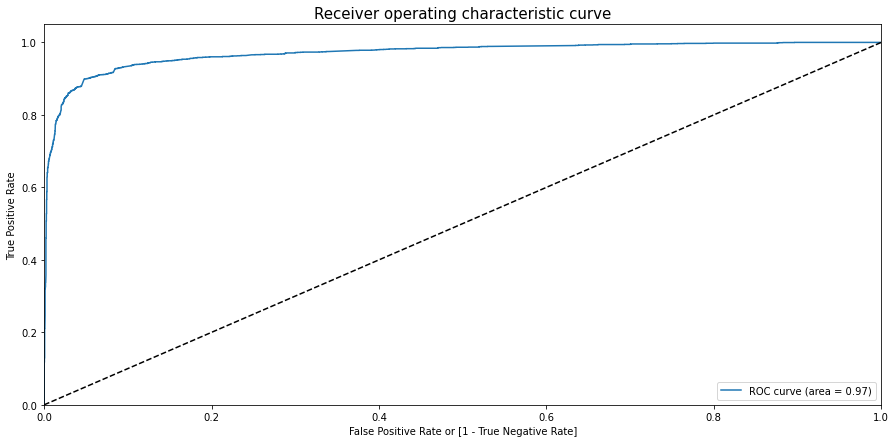

In [151]:
# calling roc curve function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve is 0.97 which is near to 1 so we can say that the model is working fine. 

# Finding Optimal Cutoff Point

Balancing sensitivity and specificity

In [152]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Lead Number  predicted  Conversion_prob  0.0  \
0          0         0.107212         5310          0         0.108547    1   
1          0         0.015548         2181          0         0.016637    1   
2          0         0.025280         8215          0         0.051285    1   
3          0         0.400881         8887          1         0.615734    1   
4          0         0.077915         7920          0         0.170876    1   

   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    1    0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0    0    0  
3    1    1    1    1    0    0    0    0    0  
4    0    0    0    0    0    0    0    0    0

In [153]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.394598  1.000000  0.000000
0.1   0.1  0.850978  0.961054  0.779231
0.2   0.2  0.905309  0.940598  0.882308
0.3   0.3  0.918193  0.928796  0.911282
0.4   0.4  0.927817  0.903226  0.943846
0.5   0.5  0.927507  0.875295  0.961538
0.6   0.6  0.927197  0.861133  0.970256
0.7   0.7  0.923626  0.843037  0.976154
0.8   0.8  0.910897  0.802911  0.981282
0.9   0.9  0.882024  0.716365  0.990000


It looks like 0.3 probability is our ideal threshold, as all 3 values are nearly equal and high at that point.

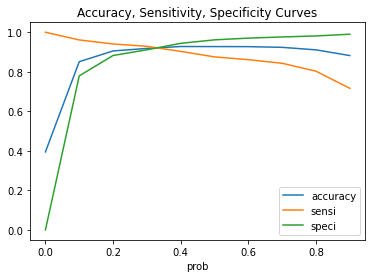

In [154]:
# Let's plot accuracy sensitivity and specificity curves for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Accuracy, Sensitivity, Specificity Curves')
plt.show()

The graph above confirms the pick of 0.3 probability as the optimum point of threshold.


In [155]:
# assigning final_predicted from conversion probability, based on the optimum 0.3 threshold derived above
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Lead Number  predicted  Conversion_prob  0.0  \
0          0         0.107212         5310          0         0.108547    1   
1          0         0.015548         2181          0         0.016637    1   
2          0         0.025280         8215          0         0.051285    1   
3          0         0.400881         8887          1         0.615734    1   
4          0         0.077915         7920          0         0.170876    1   

   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    1    0    0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0    0    0    0                0  
2    0    0    0    0    0    0    0    0    0                0  
3    1    1    1    1    0    0    0    0    0                1  
4    0    0    0    0    0    0    0    0    0                0

In [156]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9181931077305184

In [157]:
# Second confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3554,  346],
       [ 181, 2361]], dtype=int64)

In [158]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [159]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.9287962234461055

In [160]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.08871794871794872


In [161]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8721832286664204


In [162]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9515394912985274


# Precision and Recall Score

In [163]:
# Precision score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9159420289855073

In [164]:
# Recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8701809598741149

# Precision and Recall tradeoff

In [165]:
print("Top 10 y_train_pred_final converted values:\n",y_train_pred_final.Converted.head(10))
print()
print("Top 10 y_train_pred_final predicted values:\n",y_train_pred_final.predicted.head(10))

Top 10 y_train_pred_final converted values:
 0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    1
Name: Converted, dtype: int64

Top 10 y_train_pred_final predicted values:
 0    0
1    0
2    0
3    1
4    0
5    1
6    1
7    1
8    0
9    1
Name: predicted, dtype: int64


In [166]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

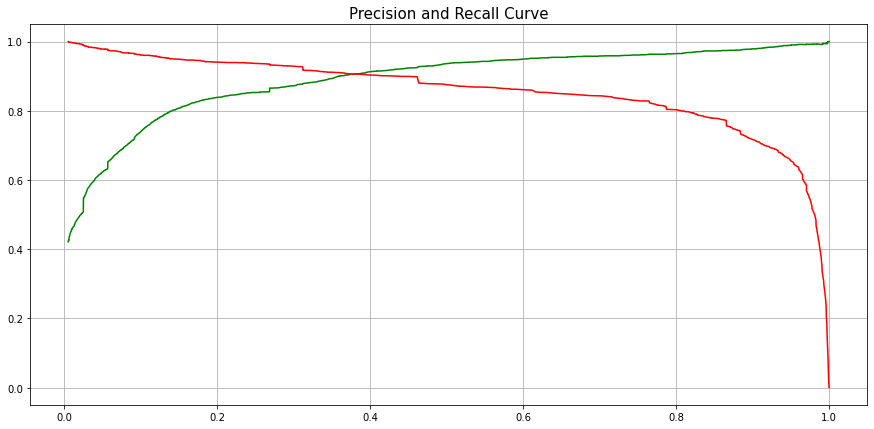

In [167]:
# Precision and Recall Curve
plt.figure(figsize=[15,7])
plt.plot(thresholds, p[:-1], "g-" , scalex=True)
plt.plot(thresholds, r[:-1], "r-", scalex=True)
plt.title('Precision and Recall Curve', fontsize=15)
plt.grid(True)
plt.show()

As per the graph, the intersection point is 0.38

 # Making predictions on the test set

In [168]:
# assigning the relevant columns
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Forms and Lead  \
2400             0                     0.423856                           0   
849              0                     0.029930                           0   
7459             0                     0.058539                           0   
6184             1                     0.233715                           0   
4869             0                     0.581426                           0   

      Tags_Already a student  Tags_Closed by Horizzon  \
2400                       0                        0   
849                        0                        0   
7459                       1                        0   
6184                       0                        0   
4869                       0                        0   

      Tags_Graduation in progress  Tags_Interested  in full time MBA  \
2400                            0                                  0   
849                             0                                  0   
7459                            0                                  0   
6184                            0                                  0   
4869                            0                                  0   

      Tags_Interested in other courses  Tags_Lost to EINS  \
2400                                 0                  0   
849                                  0                  0   
7459                                 0                  0   
6184                                 0                  0   
4869                                 0                  0   

      Tags_Not doing further education  Tags_Others  Tags_Phone Unreachable  \
2400                                 0            0                       0   
849                                  0            0                       0   
7459                                 0            0                       0   
6184                                 0            1                       0   
4869                                 0            0                       0   

      Tags_Will revert after reading the email  \
2400                                         1   
849                                          0   
7459                                         0   
6184                                         0   
4869                                         1   

      Last Notable Activity_Email Opened  Last Notable Activity_Others  \
2400                                   0                             0   
849                                    0                             0   
7459                                   1                             0   
6184                                   0                             0   
4869                                   1                             0   

      Last Notable Activity_SMS Sent  
2400                               1  
849                                0  
7459                               0  
6184                               0  
4869                               0

In [169]:
# adding constant to X_test
X_test_sm = sm.add_constant(X_test)

In [170]:
# making y_test_pred prediction from X_test_sm
y_test_pred = res.predict(X_test_sm)

In [171]:
# checking first 10 values
y_test_pred[:10]

2400    0.996457
849     0.056872
7459    0.008571
6184    0.012382
4869    0.985468
2519    0.998471
5419    0.018289
2103    0.973516
3987    0.051285
3512    0.002507
dtype: float64

In [172]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [173]:
# Let's see the head y_pred_1
y_pred_1.head()

0
2400  0.996457
849   0.056872
7459  0.008571
6184  0.012382
4869  0.985468

In [174]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [175]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [176]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [177]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [178]:
## Let's see the head
y_pred_final.head()

Converted  Lead Number         0
0          1         2400  0.996457
1          0          849  0.056872
2          0         7459  0.008571
3          1         6184  0.012382
4          1         4869  0.985468

In [179]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [180]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Conversion_Prob'], axis=1)

In [181]:
# Let's see the head of y_pred_final
y_pred_final.head()

Lead Number  Converted  Conversion_Prob
0         2400          1         0.996457
1          849          0         0.056872
2         7459          0         0.008571
3         6184          1         0.012382
4         4869          1         0.985468

In [182]:
# adding final_predicted variable based on 0.38 threshold
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [183]:
# Adding and calculating lead score from conversion probability
y_pred_final['Lead Score'] = round(y_pred_final.Conversion_Prob * 100)

In [184]:
## Let's see the head of y_pred_final
y_pred_final.head()

Lead Number  Converted  Conversion_Prob  final_predicted  Lead Score
0         2400          1         0.996457                1       100.0
1          849          0         0.056872                0         6.0
2         7459          0         0.008571                0         1.0
3         6184          1         0.012382                0         1.0
4         4869          1         0.985468                1        99.0

In [185]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9210716871832005

In [186]:
# third confusion matrix
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1652,  120],
       [  98,  892]], dtype=int64)

In [187]:
TP = confusion3[1,1] # true positives
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [188]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.901010101010101

In [189]:
# Let us calculate specificity
TN / float(TN+FP)

0.9322799097065463

# Final Observations

In [190]:
# Creating dataframe to compare metric scores of train and test
Final_metric_score = pd.DataFrame({"Train":[0.92, 0.93, 0.95], "Test":[0.92,0.90,0.93]}, index=['Accuracy', 'Sensitivity', "Specificity"])
print(Final_metric_score)

             Train  Test
Accuracy      0.92  0.92
Sensitivity   0.93  0.90
Specificity   0.95  0.93


In [191]:
# Figuring out the important features/variable of the Model. 
print("Features Importance")
print(res.params)

Features Importance
const                                      -2.917702
Do Not Email                               -1.178022
Total Time Spent on Website                 3.651781
Lead Origin_Forms and Lead                  2.371304
Tags_Already a student                     -3.068484
Tags_Closed by Horizzon                     5.907348
Tags_Graduation in progress                -1.055075
Tags_Interested  in full time MBA          -1.859045
Tags_Interested in other courses           -2.604393
Tags_Lost to EINS                           5.963161
Tags_Not doing further education           -3.047570
Tags_Others                                -1.136795
Tags_Phone Unreachable                     -2.369805
Tags_Will revert after reading the email    3.989566
Last Notable Activity_Email Opened          1.021636
Last Notable Activity_Others                1.716340
Last Notable Activity_SMS Sent              3.019506
dtype: float64


* All the metric are fairly high with very little variance between train and test performance. This indicates that the model is working well for the dataset and is not overfitted.
* X Education can achieve its CEO's target of 80% lead conversion rate with this model.
* Top 5 features of the Model are with their Coefficient factor : 
> 1.     Tags_Lost to EINS                           5.963161
> 1.     Tags_Closed by Horizzon                     5.907348
> 1.     Tags_Will revert after reading the email    3.989566
> 1.     Total Time Spent on Website                 3.651781
> 1.     Last Notable Activity_SMS Sent              3.019506
    